# Application of Machine Learning on Employee Profiling Analysis
## Problem Background

HR analytics is the process of collecting and analyzing of employee data to improve management strategics and business outcomes. Useful insights can be used to improve workforce processes and promote positive employee experience.[1]

Employees in a company can be diverse in background and interest.Knowing employees helps the management team to understand their needs and expectations from the organization. [2]This helps to adjust management strategies according to the needs and interest. 

Good management strategies motivate employees to spare no effort in executing daily tasks and be postitive.Most importantly , it helps to retain talents in the organization.Otherwise,improper management strategies can lead to dissapointments and lose of employee. [3]


Machine Learning is defined by Mitchell (1997) as the study of computer algorithms that improve automatically through experience. [4] Machine learning comes to our sight in the recent decades with its ease and high performance. It has the capacity to learn and identify patterns from data and make decision.[5]

In this paper, we will make use of machine learning techniques to assist us in clustering the employee so that we can better understand them.

## Problem Statement
How can we make us of machine learning to cluster the employees in a organisation?

## Workflow

Chen (2022) evaluated several mixed data clustering methods and concluded that that the FAMD + PAM method seems to be the most stable and have the highest performance among the methods.[6]


## Install Dependencies

In [81]:
!pip install prince scikit-learn-extra  scikit-plot numpy gower matplotlib xlrd pandas seaborn scikit-learn==1.0.2 phik statsmodels pyampute  missingno mlxtend --user 

In [82]:
!pip install -e git+https://github.com/jundongl/scikit-feature.git@48cffad4e88ff4b9d2f1c7baffb314d1b3303792#egg=skfeature

Obtaining skfeature from git+https://github.com/jundongl/scikit-feature.git@48cffad4e88ff4b9d2f1c7baffb314d1b3303792#egg=skfeature
  Skipping because already up-to-date.
  Attempting uninstall: skfeature
    Found existing installation: skfeature 1.0.0
    Uninstalling skfeature-1.0.0:
      Successfully uninstalled skfeature-1.0.0
  Running setup.py develop for skfeature


## Import Dependencies

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")

# Statistical Analysis
import phik
from scipy import stats
import matplotlib.ticker as ticker
from scipy.stats import norm

# Data Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import  OneHotEncoder
from sklearn.preprocessing import  MinMaxScaler,RobustScaler


# Pipelines
from sklearn.pipeline import Pipeline

# Clustering
from sklearn.cluster import KMeans, AgglomerativeClustering ,DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import NearestNeighbors
from sklearn_extra.cluster import KMedoids
## Evaluation
import scikitplot as skplt
from scipy.cluster.hierarchy import dendrogram

from sklearn.metrics import davies_bouldin_score,silhouette_score, silhouette_samples

# Hyperparameter Tuning
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import make_scorer
sns.set()

# Random State
random_state = 0


## Data Ingestion
The dataset used in the experiment was the “IBM HR Analytics Employee Attrition & Performance” obtained from the Kaggle Machine Learning Community. The dataset was first collected by Subhash (2017).[7] The initial datasets consist of 35 independent features. The 35 features have been reduced to a subset of 13 independent features through feature selection by the contributors of the experiment. 

The description for some encoded categorical features are listed below.

Education
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

EnvironmentSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobInvolvement 
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobSatisfaction 
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

PerformanceRating 
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

RelationshipSatisfaction 
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

WorkLifeBalance 
1 'Bad'
2 'Good'
3 'Better'
4 'Best'

In [84]:
emDf=pd.read_csv('Company_Employee.csv')
emDf

Age  Gender     BusinessTravel            Job Function  \
0      41  Female      Travel_Rarely                   Sales   
1      49    Male  Travel_Frequently  Research & Development   
2      37    Male      Travel_Rarely  Research & Development   
3      33  Female  Travel_Frequently  Research & Development   
4      27    Male      Travel_Rarely  Research & Development   
...   ...     ...                ...                     ...   
1465   36    Male  Travel_Frequently  Research & Development   
1466   39    Male      Travel_Rarely  Research & Development   
1467   27    Male      Travel_Rarely  Research & Development   
1468   49    Male  Travel_Frequently                   Sales   
1469   34    Male      Travel_Rarely  Research & Development   

      Distance Between Company and Home (KM)  \
0                                          1   
1                                          8   
2                                          2   
3                                          3   
4                                          2   
...                                      ...   
1465                                      23   
1466                                       6   
1467                                       4   
1468                                       2   
1469                                       8   

      Education (1 is lowest, 5 is highest)  \
0                                         2   
1                                         1   
2                                         2   
3                                         4   
4                                         1   
...                                     ...   
1465                                      2   
1466                                      1   
1467                                      3   
1468                                      3   
1469                                      3   

      Job Satisfaction (1 is lowest, 4 is highest) MaritalStatus  Salary ($)  \
0                                                4        Single        5993   
1                                                2       Married        5130   
2                                                3        Single        2090   
3                                                3       Married        2909   
4                                                2       Married        3468   
...                                            ...           ...         ...   
1465                                             4       Married        2571   
1466                                             1       Married        9991   
1467                                             2       Married        6142   
1468                                             2       Married        5390   
1469                                             3       Married        4404   

      Performance Rating (1 is lowest, 4 is highest)  \
0                                                  3   
1                                                  4   
2                                                  3   
3                                                  3   
4                                                  3   
...                                              ...   
1465                                               3   
1466                                               3   
1467                                               4   
1468                                               3   
1469                                               3   

      Work Life Balance (1 is worst, 4 is best)  Length of Service (Years)  \
0                                             1                          6   
1                                             3                         10   
2                                             3                          0   
3                                             3                          8   
4                                             3                        

## Data Exploration

### Data Structure

The dataset consist of 13 features.There are 1470 entries in the dataset. By viewing the basic information of the data structure,we observed that

        - There seems to be no missing values
        - The data structure of the attributes seems to be right.

In [85]:
emDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Age                                             1470 non-null   int64 
 1   Gender                                          1470 non-null   object
 2   BusinessTravel                                  1470 non-null   object
 3   Job Function                                    1470 non-null   object
 4   Distance Between Company and Home (KM)          1470 non-null   int64 
 5   Education (1 is lowest, 5 is highest)           1470 non-null   int64 
 6   Job Satisfaction (1 is lowest, 4 is highest)    1470 non-null   int64 
 7   MaritalStatus                                   1470 non-null   object
 8   Salary ($)                                      1470 non-null   int64 
 9   Performance Rating (1 is lowest, 4 is highest)  1470

### Missing data
At first glance , we observed that there are no missing data. The dataset seems to be relatively clean.

In [86]:
pd.DataFrame(emDf.isna().sum().sort_values(ascending=False))

0
Age                                             0
Gender                                          0
BusinessTravel                                  0
Job Function                                    0
Distance Between Company and Home (KM)          0
Education (1 is lowest, 5 is highest)           0
Job Satisfaction (1 is lowest, 4 is highest)    0
MaritalStatus                                   0
Salary ($)                                      0
Performance Rating (1 is lowest, 4 is highest)  0
Work Life Balance (1 is worst, 4 is best)       0
Length of Service (Years)                       0
Resign Status                                   0

<AxesSubplot:title={'center':'Number of missing values in features'}>

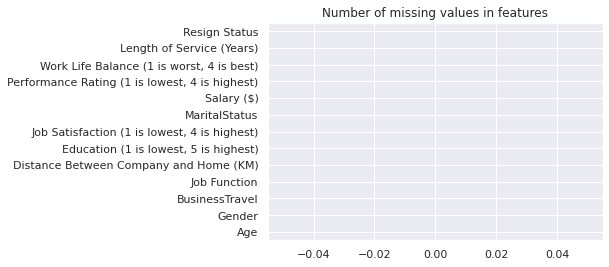

In [87]:
emDf.isna().sum().sort_values().plot.barh(title='Number of missing values in features')

### Quantitative Variables


In [88]:
quantitativeVariables=['Age','Distance Between Company and Home (KM)','Education (1 is lowest, 5 is highest)','Job Satisfaction (1 is lowest, 4 is highest)','Salary ($)','Performance Rating (1 is lowest, 4 is highest)','Work Life Balance (1 is worst, 4 is best)','Length of Service (Years)']

### Qualitative Variables


In [89]:
qualitativeVariables=['Gender', 'BusinessTravel','Job Function','Resign Status','MaritalStatus']

### Univariate Analysis

From the descriptive statistics ,we observed that

        - The average age of people in the company is 36 which is mid-aged.
        - More than 50% of the population has education of Bachelor and above.
        - 38.9% of the population has a degree
        - More than 75% of the population are satisfied with the job. 31% of the population are extremely satisfied.
        - The average salary of the population are around $6,502
        - More than 75% of the population has excellent performance
        - The average length of stay of employee is 7 years which means most staff are loyal and committed.
        - More than half of the population is male
        - 70% of the population does not travel frequent
        - 45% of the population are married.
        

In [90]:
emDf[quantitativeVariables].describe()

Age  Distance Between Company and Home (KM)  \
count  1470.000000                             1470.000000   
mean     36.923810                                9.192517   
std       9.135373                                8.106864   
min      18.000000                                1.000000   
25%      30.000000                                2.000000   
50%      36.000000                                7.000000   
75%      43.000000                               14.000000   
max      60.000000                               29.000000   

       Education (1 is lowest, 5 is highest)  \
count                            1470.000000   
mean                                2.912925   
std                                 1.024165   
min                                 1.000000   
25%                                 2.000000   
50%                                 3.000000   
75%                                 4.000000   
max                                 5.000000   

       Job Satisfaction (1 is lowest, 4 is highest)    Salary ($)  \
count                                   1470.000000   1470.000000   
mean                                       2.728571   6502.931293   
std                                        1.102846   4707.956783   
min                                        1.000000   1009.000000   
25%                                        2.000000   2911.000000   
50%                                        3.000000   4919.000000   
75%                                        4.000000   8379.000000   
max                                        4.000000  19999.000000   

       Performance Rating (1 is lowest, 4 is highest)  \
count                                     1470.000000   
mean                                         3.153741   
std                                          0.360824   
min                                          3.000000   
25%                                          3.000000   
50%                                          3.000000   
75%                                          3.000000   
max                                          4.000000   

       Work Life Balance (1 is worst, 4 is best)  Length of Service (Years)  
count                                1470.000000                1470.000000  
mean                                    2.761224                   7.008163  
std                                     0.706476                   6.126525  
min                                     1.000000                   0.000000  
25%                                     2.000000                   3.000000  
50%                                     3.000000                   5.000000  
75%                                     3.000000                   9.000000  
max                                     4.000000                  40.000000

In [91]:
emDf[['Education (1 is lowest, 5 is highest)','Job Satisfaction (1 is lowest, 4 is highest)','Performance Rating (1 is lowest, 4 is highest)','Work Life Balance (1 is worst, 4 is best)']].astype('O').describe()

Education (1 is lowest, 5 is highest)  \
count                                    1470   
unique                                      5   
top                                         3   
freq                                      572   

        Job Satisfaction (1 is lowest, 4 is highest)  \
count                                           1470   
unique                                             4   
top                                                4   
freq                                             459   

        Performance Rating (1 is lowest, 4 is highest)  \
count                                             1470   
unique                                               2   
top                                                  3   
freq                                              1244   

        Work Life Balance (1 is worst, 4 is best)  
count                                        1470  
unique                                          4  
top                                             3  
freq                                          893

In [92]:
emDf[qualitativeVariables].describe()

Gender BusinessTravel            Job Function Resign Status  \
count    1470           1470                    1470          1470   
unique      2              3                       3             2   
top      Male  Travel_Rarely  Research & Development            No   
freq      882           1043                     961          1233   

       MaritalStatus  
count           1470  
unique             3  
top          Married  
freq             673

From the qualitative analysis, we observed that 

        - More than 80% of the population does not travel or travel rarely
        - Many staff are from the research and development department. The sales has the second largest number of staff followed by human resources.
        - More than 83% of the population are still active in position
        - 31.2% of the population are single.
        

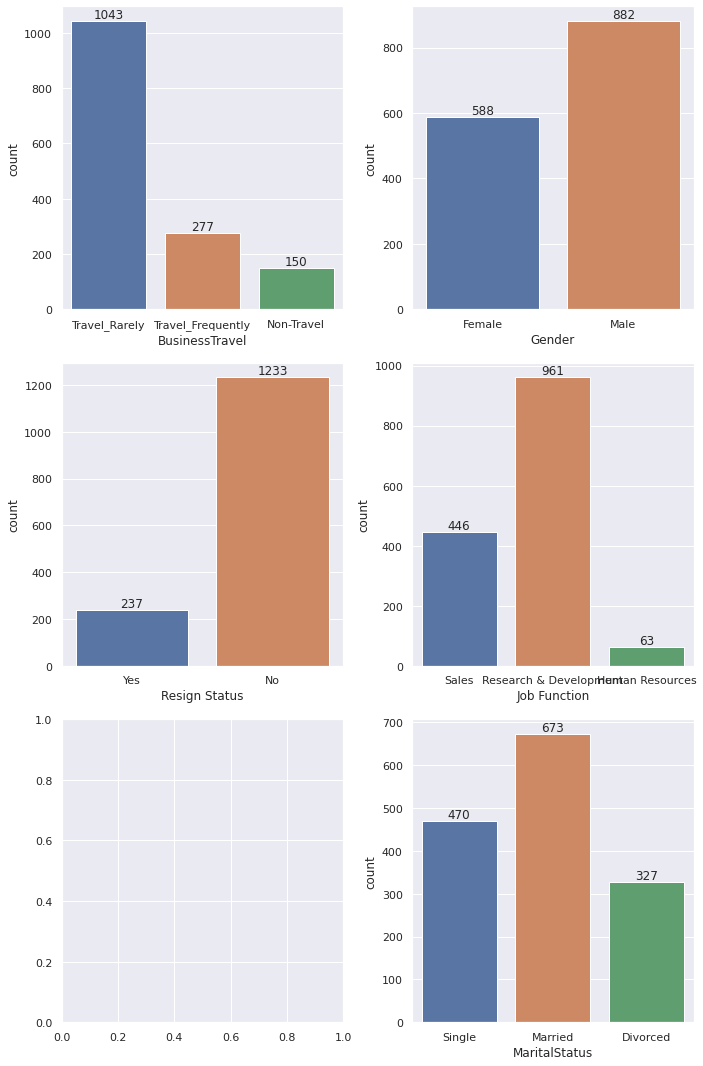

In [93]:
fig, ax = plt.subplots(int(np.ceil(len(qualitativeVariables)/2)), 2, figsize=(10, 15), tight_layout=True)
for i,y in enumerate(qualitativeVariables):
    n=1 if i%2==0 else 0
    g=sns.countplot(x=y,data=emDf,ax=ax[int(np.floor(i/2)),n])
    g.bar_label(g.containers[0])
fig.show()

From the qualitative analysis, we observed that

    - The distribution of the age of employee is slightly positively skewed
    - The salary and length of service is positively skewed.
    - Log transformation will not be carried out on the salary as it does not follows a log normal distribution
    - All the employee has performance rating above 3.0

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Distance Between Company and Home (KM)'}>,
        <AxesSubplot:title={'center':'Education (1 is lowest, 5 is highest)'}>],
       [<AxesSubplot:title={'center':'Job Satisfaction (1 is lowest, 4 is highest)'}>,
        <AxesSubplot:title={'center':'Salary ($)'}>,
        <AxesSubplot:title={'center':'Performance Rating (1 is lowest, 4 is highest)'}>],
       [<AxesSubplot:title={'center':'Work Life Balance (1 is worst, 4 is best)'}>,
        <AxesSubplot:title={'center':'Length of Service (Years)'}>,
        <AxesSubplot:>]], dtype=object)

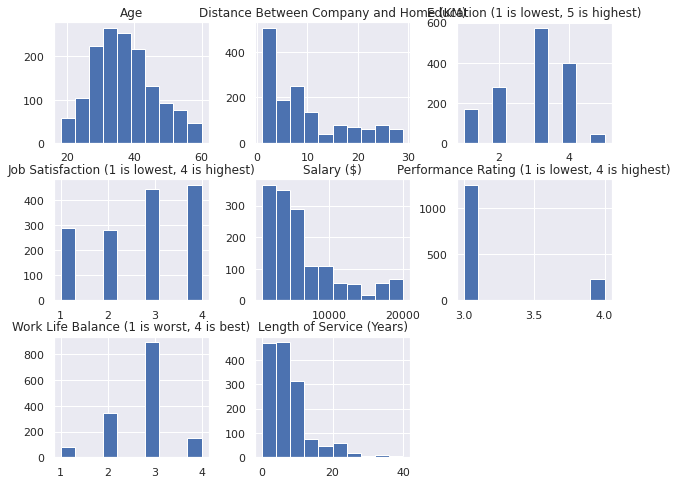

In [94]:
emDf[quantitativeVariables].hist(figsize=(10, 8))

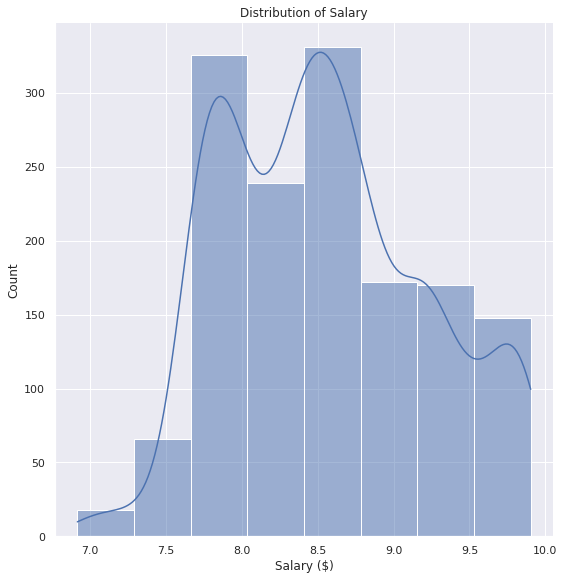

In [95]:
sns.displot(emDf["Salary ($)"].map(np.log), kde=True, height = 8,bins=8)
plt.title("Distribution of Salary")
plt.show()

### Outliers

From the outliers analysis,we observed that

        - There are extreme outliers for salary.Some employee has extremely high salary
        - There are extreme outliers for length of service. Many employee are very loyal to the company and work more than 20 years

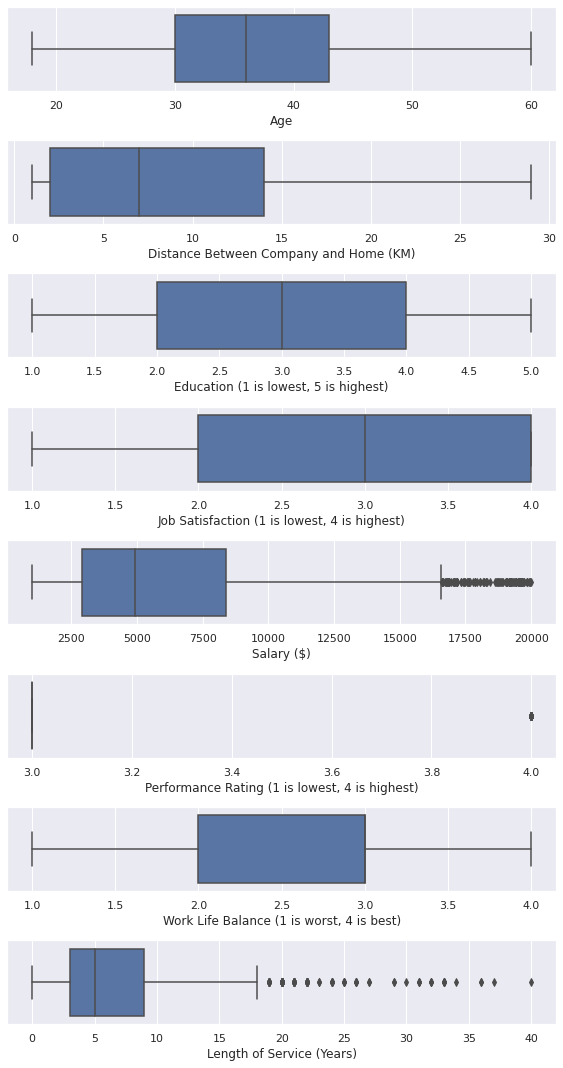

In [96]:
fig, ax = plt.subplots(len(quantitativeVariables), 1, figsize=(8, 15), tight_layout=True)
for idx, feature in enumerate(quantitativeVariables):
    sns.boxplot(data=emDf, x=feature, ax = ax[idx])
fig.show()

### Bivariate Analysis
From the quantitative analysis, we observed that

        - Employees that resigned tend to be younger. 
        - Employees that resigned tend to have lesser salary than average population
        - Employees that have high job satisfaction tend to stay in the company
        - Employeees that have very poor work life inbalance tend to resign

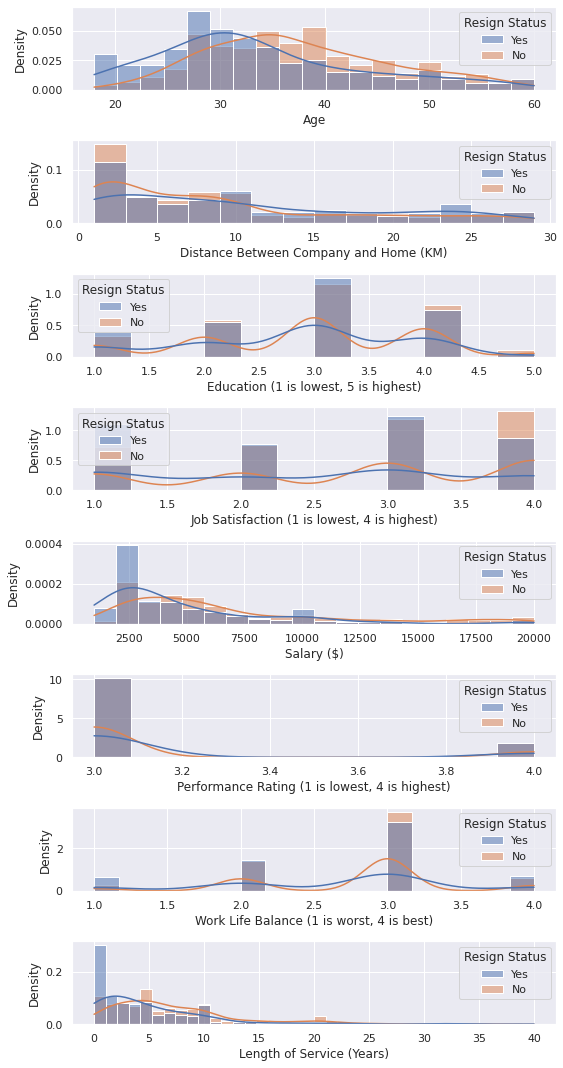

In [97]:
fig, ax = plt.subplots(len(quantitativeVariables), 1, figsize=(8, 15), tight_layout=True)
for idx, feature in enumerate(quantitativeVariables):

    sns.histplot(data=emDf,common_norm = False,stat='density', x=feature, hue="Resign Status",ax=ax[idx],kde=True)
fig.show()

In [98]:
def ratioPlot(data,target,correspond,label):
    while (correspond in target):
        print('Warning: Found target label in array. Ignoring...')
        target.remove(correspond)
    fig, ax = plt.subplots(len(target), 1, figsize=(8, 8), tight_layout=True)

    for idx, feature in enumerate(target):
        unique=data[feature].unique()
        start=[]
        for option in unique:
            start.append(np.sum(data[data[correspond]==label][feature]==option)/np.sum(data[feature]==option))
        qualityPercentage=pd.DataFrame({feature:unique,'Percentage':start})
        if (len(target)==1):
             sns.barplot(data=qualityPercentage,x=feature,y='Percentage',ax=ax)
        else:
                sns.barplot(data=qualityPercentage,x=feature,y='Percentage',ax=ax[idx])
            
       
    return fig.show()
        

From the quantitative analysis, we observed that

        - Single employees have higher tendency of resigning compared to those that are married. This is understandable since married employee has family to raise.Therefore,they usually want to be stable.
        - Many resigned come from Sales and HR department.

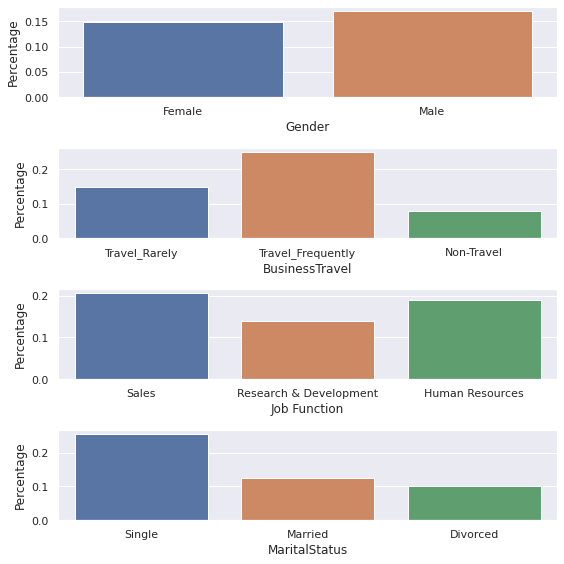

In [99]:
ratioPlot(emDf,qualitativeVariables,'Resign Status','Yes')

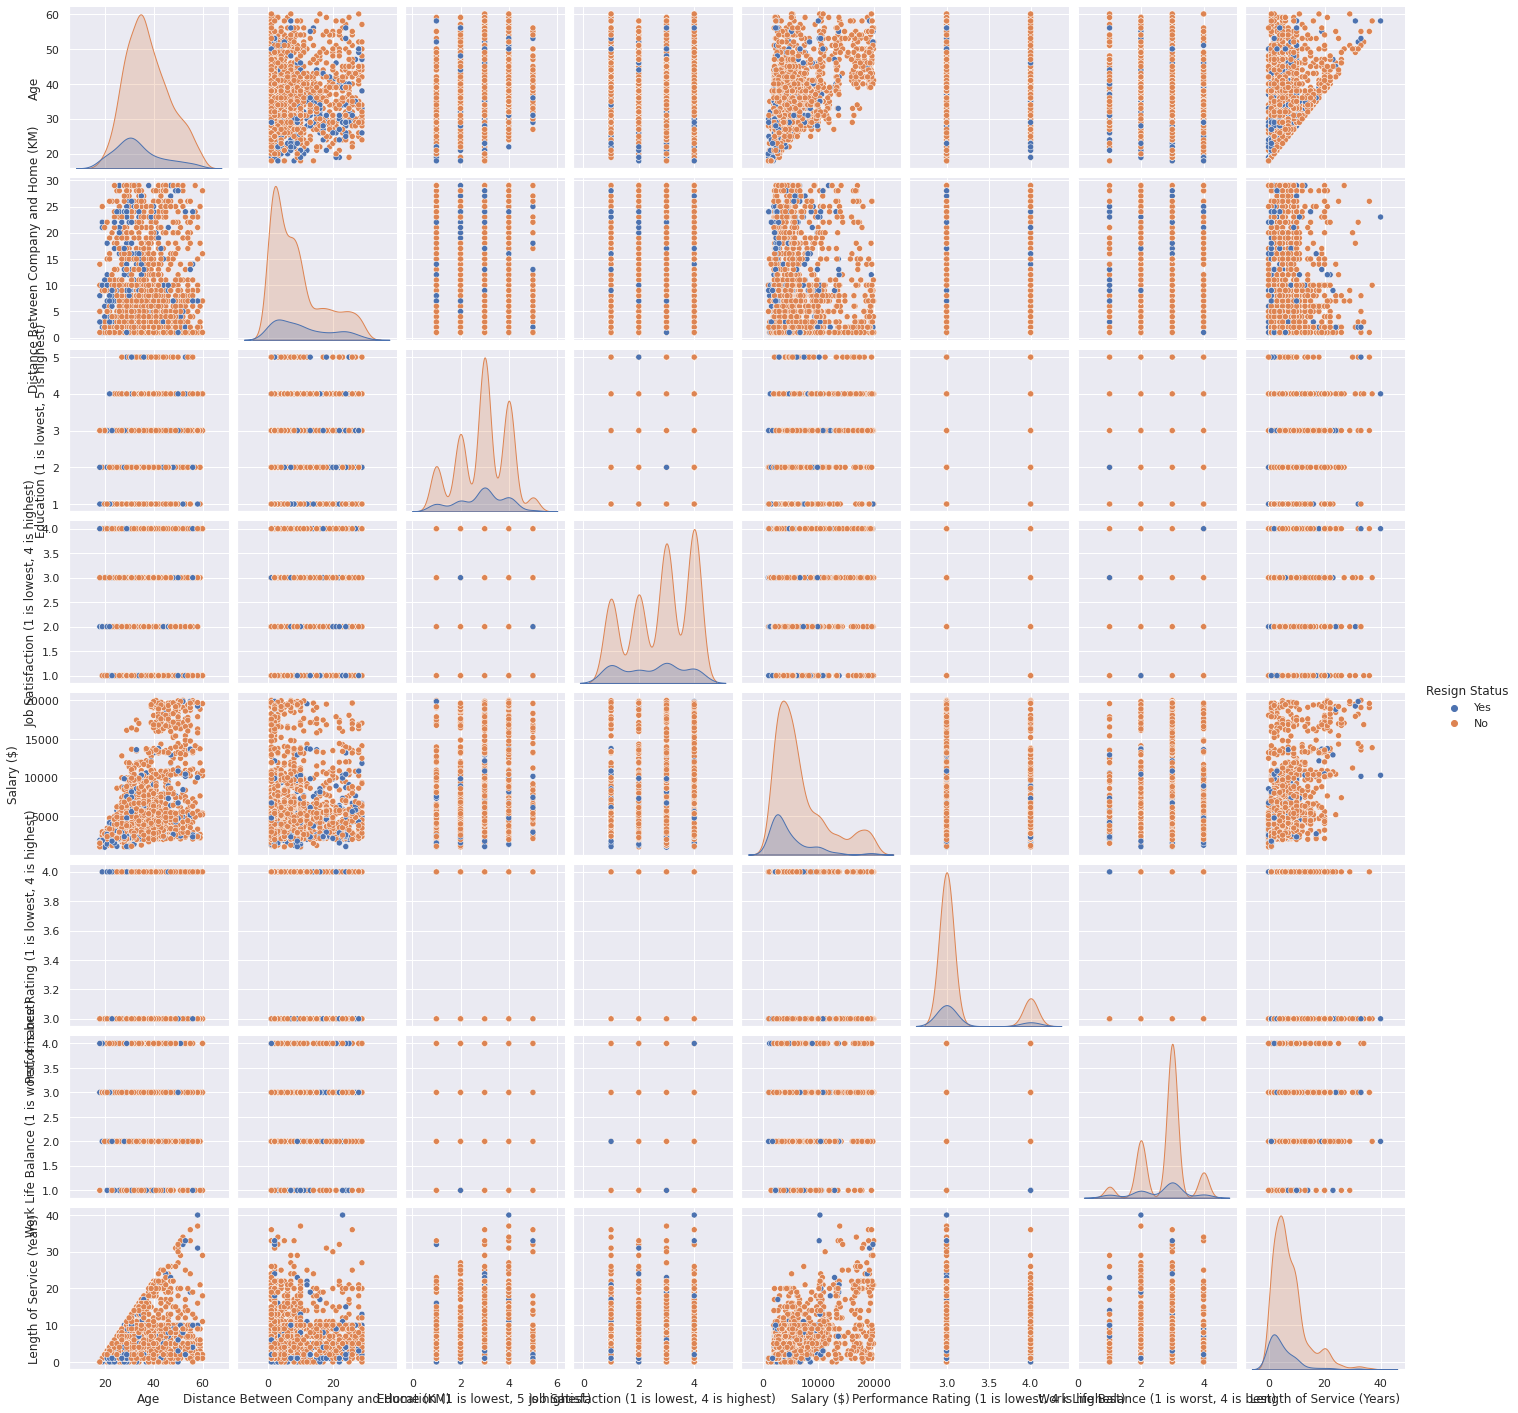

In [100]:
sns.pairplot(emDf, hue="Resign Status")

From the correlation matrix, we did not see any strong correlation between the attributes. The highest was from age and length of service which acheieved a correlation of 0.56

interval columns not set, guessing: ['Age', 'Distance Between Company and Home (KM)', 'Education (1 is lowest, 5 is highest)', 'Job Satisfaction (1 is lowest, 4 is highest)', 'Salary ($)', 'Performance Rating (1 is lowest, 4 is highest)', 'Work Life Balance (1 is worst, 4 is best)', 'Length of Service (Years)']


Text(0.5, 1.0, 'Correlation Matrix')

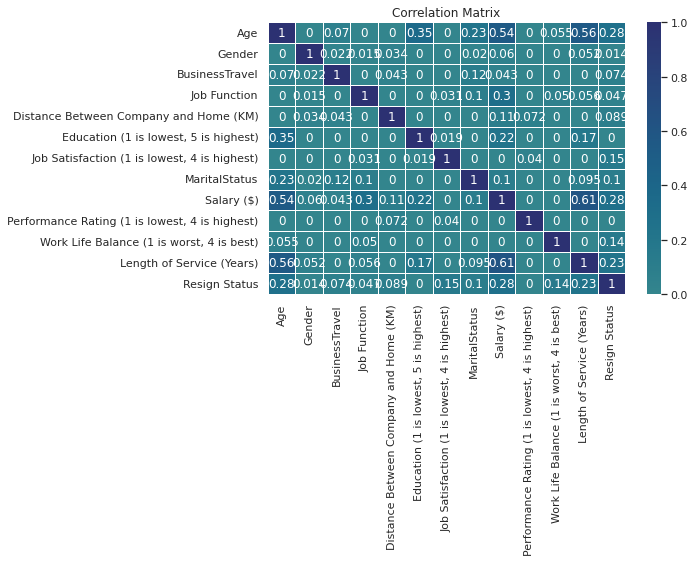

In [101]:
corr_matrix = emDf.phik_matrix()
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(corr_matrix, annot = True, linewidths=.5,center = 0,cmap="crest",ax=ax).set_title('Correlation Matrix')

## Data Preprocessing

The range of values in raw data can vary. This may introduce biasness in machine learning later. Many machine learning algorithms does not learn properly when this occurs. Feature Scaling is an approach used to standardize and normalize the range of data.[8] This helps to ensure that all features are weight equally in their representation.

Additionally , scaling and normalisation is needed before dimensional reduction so that data can be projected onto directions which maximize the variance.
In the experiment , we used the StandardScaler to standardise the quantitative data.

In [102]:
data_preprocessing = ColumnTransformer([
    ('Preprocess Numerical Features', StandardScaler(), quantitativeVariables),
    
],remainder='passthrough')

In [103]:
x=pd.DataFrame(data_preprocessing.fit_transform(emDf)).convert_dtypes()
x[[8,9,10,11,12]]=x[[8,9,10,11,12]].astype('O')

In [104]:
x

0         1         2         3         4         5         6   \
0      0.44635 -1.010909 -0.891688  1.153254  -0.10835  -0.42623  -2.49382   
1     1.322365  -0.14715 -1.868426 -0.660853 -0.291719  2.346151  0.338096   
2     0.008343 -0.887515 -0.891688    0.2462 -0.937654  -0.42623  0.338096   
3    -0.429664 -0.764121  1.061787    0.2462 -0.763634  -0.42623  0.338096   
4    -1.086676 -0.887515 -1.868426 -0.660853 -0.644858  -0.42623  0.338096   
...        ...       ...       ...       ...       ...       ...       ...   
1465 -0.101159  1.703764 -0.891688  1.153254 -0.835451  -0.42623  0.338096   
1466  0.227347 -0.393938 -1.868426 -1.567907   0.74114  -0.42623  0.338096   
1467 -1.086676 -0.640727  0.085049 -0.660853  -0.07669  2.346151  0.338096   
1468  1.322365 -0.887515  0.085049 -0.660853 -0.236474  -0.42623 -1.077862   
1469 -0.320163  -0.14715  0.085049    0.2462 -0.445978  -0.42623  1.754054   

            7       8                  9                       10       11  \
0    -0.164613  Female      Travel_Rarely                   Sales   Single   
1     0.488508    Male  Travel_Frequently  Research & Development  Married   
2    -1.144294    Male      Travel_Rarely  Research & Development   Single   
3     0.161947  Female  Travel_Frequently  Research & Development  Married   
4    -0.817734    Male      Travel_Rarely  Research & Development  Married   
...        ...     ...                ...                     ...      ...   
1465 -0.327893    Male  Travel_Frequently  Research & Development  Married   
1466 -0.001333    Male      Travel_Rarely  Research & Development  Married   
1467 -0.164613    Male      Travel_Rarely  Research & Development  Married   
1468  0.325228    Male  Travel_Frequently                   Sales  Married   
1469 -0.491174    Male      Travel_Rarely  Research & Development  Married   

       12  
0     Yes  
1      No  
2     Yes  
3      No  
4      No  
...   ...  
1465   No  
1466   No  
1467   No  
1468   No  
1469   No  

[1470 rows x 13 columns]

### Dimensionality Reduction

The curse of dimensionality was first bought up by Bellman (1961) which refers to the phenomena where the dataset results in too many dimension.[9]

Dimensionality reduction is a process where the least important variables from the model are remove. That will reduce the model's complexity and also remove some noise in the data.[10]

The principal component analysis(PCA) is a popular dimensionality reduction method. It is frequently used as it increasing interpretability and also maximise variance.However, PCA was only design to work on continuous data.Forcing categorical data using one hot encoder can result in unequal weighage of componenet. This is due to the fact that PCA tries to minimise squared deviations and it does not make sense on categorical featues.[11]

In lights of all considerations, we used the Factor Analaysis of Mixed Data(FAMD) in this experiment to deal with the nature of mixed data of our dataset. The FAMD works by applying the principal component analysis(PCA) for quantitative data and  multiple correspondence analysis (MCA) for qualitative data.This helps to ensure that all attributes are weighted equally in anaysis.[12]

For machine learning , is is recommended that 60% of the variance should be kept.[13] Therefore, we will select 8 component which explains for 61% of the total variance.

/home/jiayu/.local/lib/python3.8/site-packages/prince/pca.py:45: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  utils.check_array(X)
/home/jiayu/.local/lib/python3.8/site-packages/prince/pca.py:45: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  utils.check_array(X)
/home/jiayu/.local/lib/python3.8/site-packages/prince/pca.py:45: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  utils.check_array(X)
/home/j

[Text(0, 0, '0.13'),
 Text(0, 0, '0.21'),
 Text(0, 0, '0.28'),
 Text(0, 0, '0.35'),
 Text(0, 0, '0.42'),
 Text(0, 0, '0.48'),
 Text(0, 0, '0.55'),
 Text(0, 0, '0.61'),
 Text(0, 0, '0.67'),
 Text(0, 0, '0.73'),
 Text(0, 0, '0.79'),
 Text(0, 0, '0.84'),
 Text(0, 0, '0.89')]

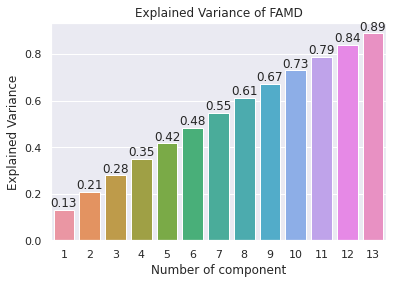

In [105]:
import prince
result=[]
eigen=[]
for n in np.arange(1,14):
    famd = prince.FAMD(n_components=n,check_input=True,)
    famd.fit(x)
    result.append(sum(famd.explained_inertia_))
ax=sns.barplot(np.arange(1,14),result)
plt.title('Explained Variance of FAMD')
plt.xlabel('Number of component')
plt.ylabel('Explained Variance')
ax.bar_label(ax.containers[0], labels=[f'{x:.2f}' for x in ax.containers[0].datavalues])

In [106]:
famd = prince.FAMD(n_components=8,check_input=True,)
x_train=famd.fit_transform(x)
x_train

/home/jiayu/.local/lib/python3.8/site-packages/prince/pca.py:45: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  utils.check_array(X)
/home/jiayu/.local/lib/python3.8/site-packages/prince/pca.py:45: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  utils.check_array(X)


0         1         2         3         4         5         6  \
0    -0.630364  1.473392 -0.309033  0.370125  0.247697 -0.898960 -1.614879   
1     0.318399 -0.562387  0.431014  0.698727  0.802700  1.420040  1.370589   
2    -1.559017  0.273759  0.332049 -0.086739 -0.394369 -0.906245  0.181959   
3    -0.097236 -0.041068 -0.639488  0.145499  0.919305 -0.373188  0.008431   
4    -1.052582 -1.127845 -0.507664 -0.550383 -0.763773  0.340537  0.493293   
...        ...       ...       ...       ...       ...       ...       ...   
1465 -0.577643 -0.608393  0.847798  0.333158  0.530540  0.999384 -0.561243   
1466  0.285920 -0.641387 -0.337665 -0.184098 -1.058968  0.412588  0.923445   
1467 -0.339999 -0.843992 -0.303914  0.243410 -0.268103  0.980049  1.002357   
1468  0.599593  0.428067  0.682593 -0.196023 -0.115752 -0.042349 -0.205258   
1469 -0.264837 -0.846301 -0.188375 -0.810987 -0.546039  0.316376  0.253874   

             7  
0     1.676506  
1     0.927878  
2     0.641484  
3    -0.671536  
4     0.935342  
...        ...  
1465 -0.228221  
1466  1.132861  
1467  0.019226  
1468  0.546491  
1469 -0.632194  

[1470 rows x 8 columns]

In [107]:
# ax = famd.plot_row_coordinates(
#     emDf,
#     ax=None,
#     figsize=(6, 6),
#     x_component=0,
#     y_component=1,
#     color_labels=['{}'.format(t) for t in emDf['Resign Status']],
    
#     ellipse_outline=False,
#     ellipse_fill=True,
#     show_points=True
#  )

### Feature Selection

Feature selection for unsupervised is a relatively new concept bought up in the recent decade. Most of the current feature selection techniques only works for supervised learing. However,Different features used in clustering can affects clustering result differently.Some features are important for clusters while some are not.Most clustering algorithm assume features to be equally important. [14]

In this experiment, we will use a filter method of Laplacian Score to evaluate the features.Laplacian score feature selection is mainly is based on the concept of Laplacian Eigenmaps [15] and Locality Preserving Projection.Features are selected based on their locality preserving power. This method is provened to work well in some dataset compared to feature selection by variance.

In [108]:
from skfeature.utility import construct_W
  
kwargs_W = {"metric":"euclidean","neighbor_mode":"knn","weight_mode":"heat_kernel","k":5,'t':1}
  
W = construct_W.construct_W(np.array(x_train ), **kwargs_W)



from skfeature.function.similarity_based import lap_score

   
score = lap_score.lap_score(np.array(x_train ), W=W)

   
print(score)
 
idx = lap_score.feature_ranking(score)




[0.0808408  0.0880984  0.0580714  0.11550363 0.09773724 0.12147092
 0.12986163 0.1509369 ]


In [109]:
# pd.DataFrame({'Feature':featurelist,'Lap Score':score})

In [110]:
maxcomponent=np.arange(2,9)
maxvalue=[]
maxdavi=[]
for i in range(2,9):
    print(i)
    silhouette_avg = []
    davi_avg=[]
    x=np.array(x_train)[:, idx[0:i]]
    for num_clusters in range(2,10):
 
     # initialise kmeans
         
         kmeans = KMeans(n_clusters=num_clusters,init="k-means++",max_iter=100)
         kmeans.fit(pd.DataFrame(x))
         cluster_labels = kmeans.labels_
         silhouette_avg.append(silhouette_score(x, cluster_labels))
         davi_avg.append(davies_bouldin_score(x, cluster_labels))

    maxvalue.append(max(silhouette_avg))
    maxdavi.append(min(davi_avg))

2
3
4
5
6
7
8


/tmp/ipykernel_12543/936427167.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  ax1.plot(maxcomponent,maxvalue,'bx-',color='blue',label='Silhouette')
/tmp/ipykernel_12543/936427167.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  ax2.plot(maxcomponent,maxdavi,'bx-',color='red',label='Davies Bouldin')


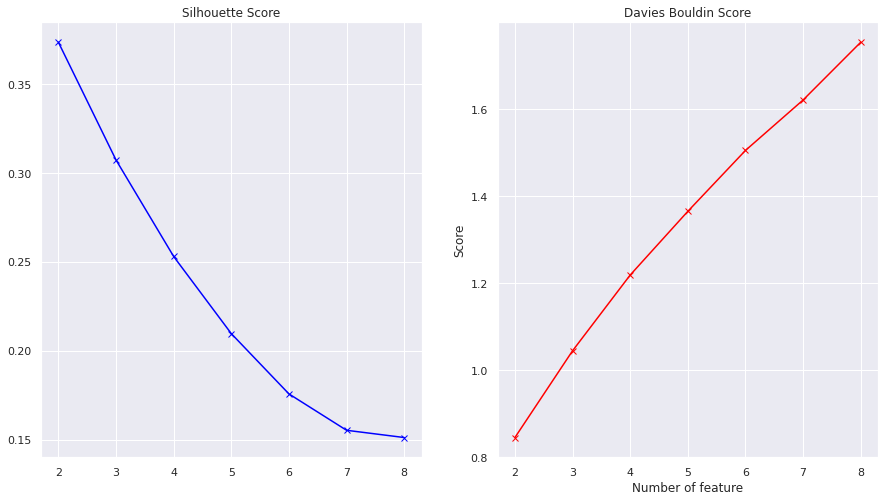

In [111]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,8))
maxcomponent=np.arange(2,9)
ax1.plot(maxcomponent,maxvalue,'bx-',color='blue',label='Silhouette')
ax1.set_title('Silhouette Score')
ax2.plot(maxcomponent,maxdavi,'bx-',color='red',label='Davies Bouldin')
ax2.set_title('Davies Bouldin Score')
plt.xlabel('Number of feature') 
plt.ylabel('Score') 
# fig.title('Laplacian Scores Feature Selection')
plt.show()

In this paper, we will select 2 features

In [112]:
x_train=np.array(x_train)[:, idx[0:2]]

## Model and Evaluation
In this paper, we will be experimenting 5 models.The model with the highest performance that have well clustered the data will be evaluated.

The Davies-Bouldin Index and the Silhouette Index will be included in the evaluation to assist us to find the best cluster that is formed.

The Davies-Bouldin Index evaluates the similarity between points in cluster and the difference between clusters. The smaller the index,the better the result. 
The Silhouette Index measure the distance between each data point, the centroid of the cluster it was assigned to and the closest centroid belonging to another cluster. The higher the index,the better the result. [16]

In [113]:
def algorithm(algo,name='cluster',x='None'):
    al = algo
    result=al.fit_predict(x)
    return result,al

In [114]:
def getCluster(dfCopy,clusters):
    df=dfCopy.copy()
    df['cluster']=clusters
    cluster_centers = df.groupby('cluster').mean()
    cluster_centers['cluster size'] = pd.Series(df['cluster']).value_counts() / len(df['cluster']) * 100
    return cluster_centers,df


In [115]:
def evaluateCluster(x,labels,algName='Undefined testing',record=pd.DataFrame({'name':[],'silihouette_score':[],'davies_bouldin_score':[]})):
    '''
    This function is used for model evaluation . 
    '''
    current=pd.DataFrame({'name':[algName],'silihouette_score':[silhouette_score(x,labels)],'davies_bouldin_score':[davies_bouldin_score(x,labels)],})
    record=pd.concat([record,current],ignore_index=True)
    display(skplt.metrics.plot_silhouette(x,labels))
    return current,record

In [116]:
qualitativeVariables=qualitativeVariables+['Education (1 is lowest, 5 is highest)','Job Satisfaction (1 is lowest, 4 is highest)','Performance Rating (1 is lowest, 4 is highest)','Work Life Balance (1 is worst, 4 is best)','Resign Status']

In [117]:
qualitativeVariables

['Gender',
 'BusinessTravel',
 'Job Function',
 'MaritalStatus',
 'Education (1 is lowest, 5 is highest)',
 'Job Satisfaction (1 is lowest, 4 is highest)',
 'Performance Rating (1 is lowest, 4 is highest)',
 'Work Life Balance (1 is worst, 4 is best)',
 'Resign Status']

In [118]:
def qualitativeEvaluation(data):

    fig, ax = plt.subplots(int(np.ceil(len(qualitativeVariables)/2)), 2, figsize=(10, 12), tight_layout=True)
    for i,fea in enumerate(qualitativeVariables):
        n=1 if i%2==0 else 0

        (data.groupby('cluster')[fea].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.barplot,'data'), x='cluster',y='percent',hue=fea,ax=ax[int(np.floor(i/2)),n]))
    return fig.show()

In [119]:
def GridSearchForK(x=None,start=2,end=15,algorithm=SpectralClustering,**kwrg):
    x=x.copy()
    silhouette_avg = []
    davies_avg=[]
    rangeSearch=range(start,end)
    for num_clusters in rangeSearch:
 
     
        sci = algorithm(n_clusters=num_clusters,**kwrg)
        if (hasattr(algorithm(),'random_state')):
            sci = algorithm(n_clusters=num_clusters,random_state=42,**kwrg)
        sci.fit(x)
        cluster_labels = sci.labels_
 
    # silhouette score
        davies_avg.append(davies_bouldin_score(x, cluster_labels))
        silhouette_avg.append(silhouette_score(x, cluster_labels))
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,8))   
    ax1.plot(rangeSearch,silhouette_avg,'bx-',color='blue',label='Silhouette')
    ax1.set_title('Silhouette Score')
    ax2.plot(rangeSearch,davies_avg,'bx-',color='red',label='Davies Bouldin')
    ax2.set_title('Davies Bouldin Score')
    plt.xlabel('Values of K') 
    return fig.show()
    

### KMethoid

/tmp/ipykernel_12543/3792593614.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  ax1.plot(rangeSearch,silhouette_avg,'bx-',color='blue',label='Silhouette')
/tmp/ipykernel_12543/3792593614.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  ax2.plot(rangeSearch,davies_avg,'bx-',color='red',label='Davies Bouldin')


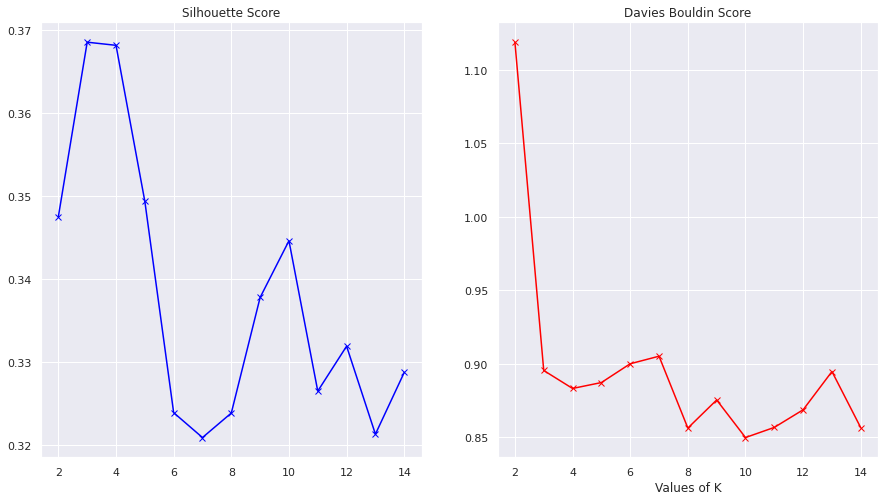

In [120]:
GridSearchForK(x_train,2,15,KMedoids,method='pam')

In [164]:
result,kme=algorithm(KMedoids(n_clusters=4,method='pam'),'cluster',x_train)
evaluation,kmeDf=getCluster(emDf,result)
evaluation

Age  Distance Between Company and Home (KM)  \
cluster                                                      
0        28.856764                                9.408488   
1        47.916667                                8.720833   
2        38.239837                               10.605691   
3        36.246537                                7.354571   

         Education (1 is lowest, 5 is highest)  \
cluster                                          
0                                     2.456233   
1                                     3.166667   
2                                     3.150407   
3                                     2.897507   

         Job Satisfaction (1 is lowest, 4 is highest)    Salary ($)  \
cluster                                                               
0                                            2.676393   3183.464191   
1                                            2.691667  14748.033333   
2                                            2.904472   6027.711382   
3                                            2.567867   5135.681440   

         Performance Rating (1 is lowest, 4 is highest)  \
cluster                                                   
0                                              3.151194   
1                                              3.150000   
2                                              3.140244   
3                                              3.177285   

         Work Life Balance (1 is worst, 4 is best)  Length of Service (Years)  \
cluster                                                                         
0                                         2.676393                   3.241379   
1                                         2.762500                  14.529167   
2                                         2.802846                   7.036585   
3                                         2.792244                   5.903047   

         cluster size  
cluster                
0           25.646259  
1           16.326531  
2           33.469388  
3           24.557823

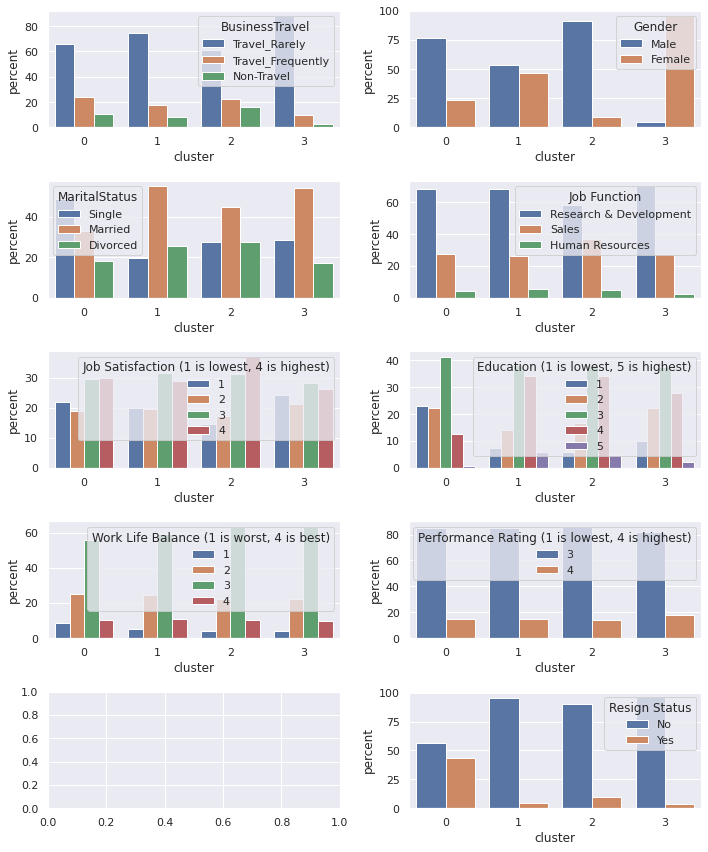

In [122]:
qualitativeEvaluation(kmeDf)

In [123]:
kmeDf.groupby('cluster')['Resign Status'].describe()

count unique top freq
cluster                      
0         377      2  No  213
1         240      2  No  229
2         492      2  No  444
3         361      2  No  347

/home/jiayu/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

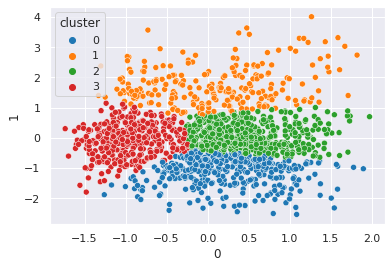

In [124]:
sns.scatterplot(pd.DataFrame(x_train)[0],pd.DataFrame(x_train)[1],hue=kmeDf.cluster, palette="tab10")

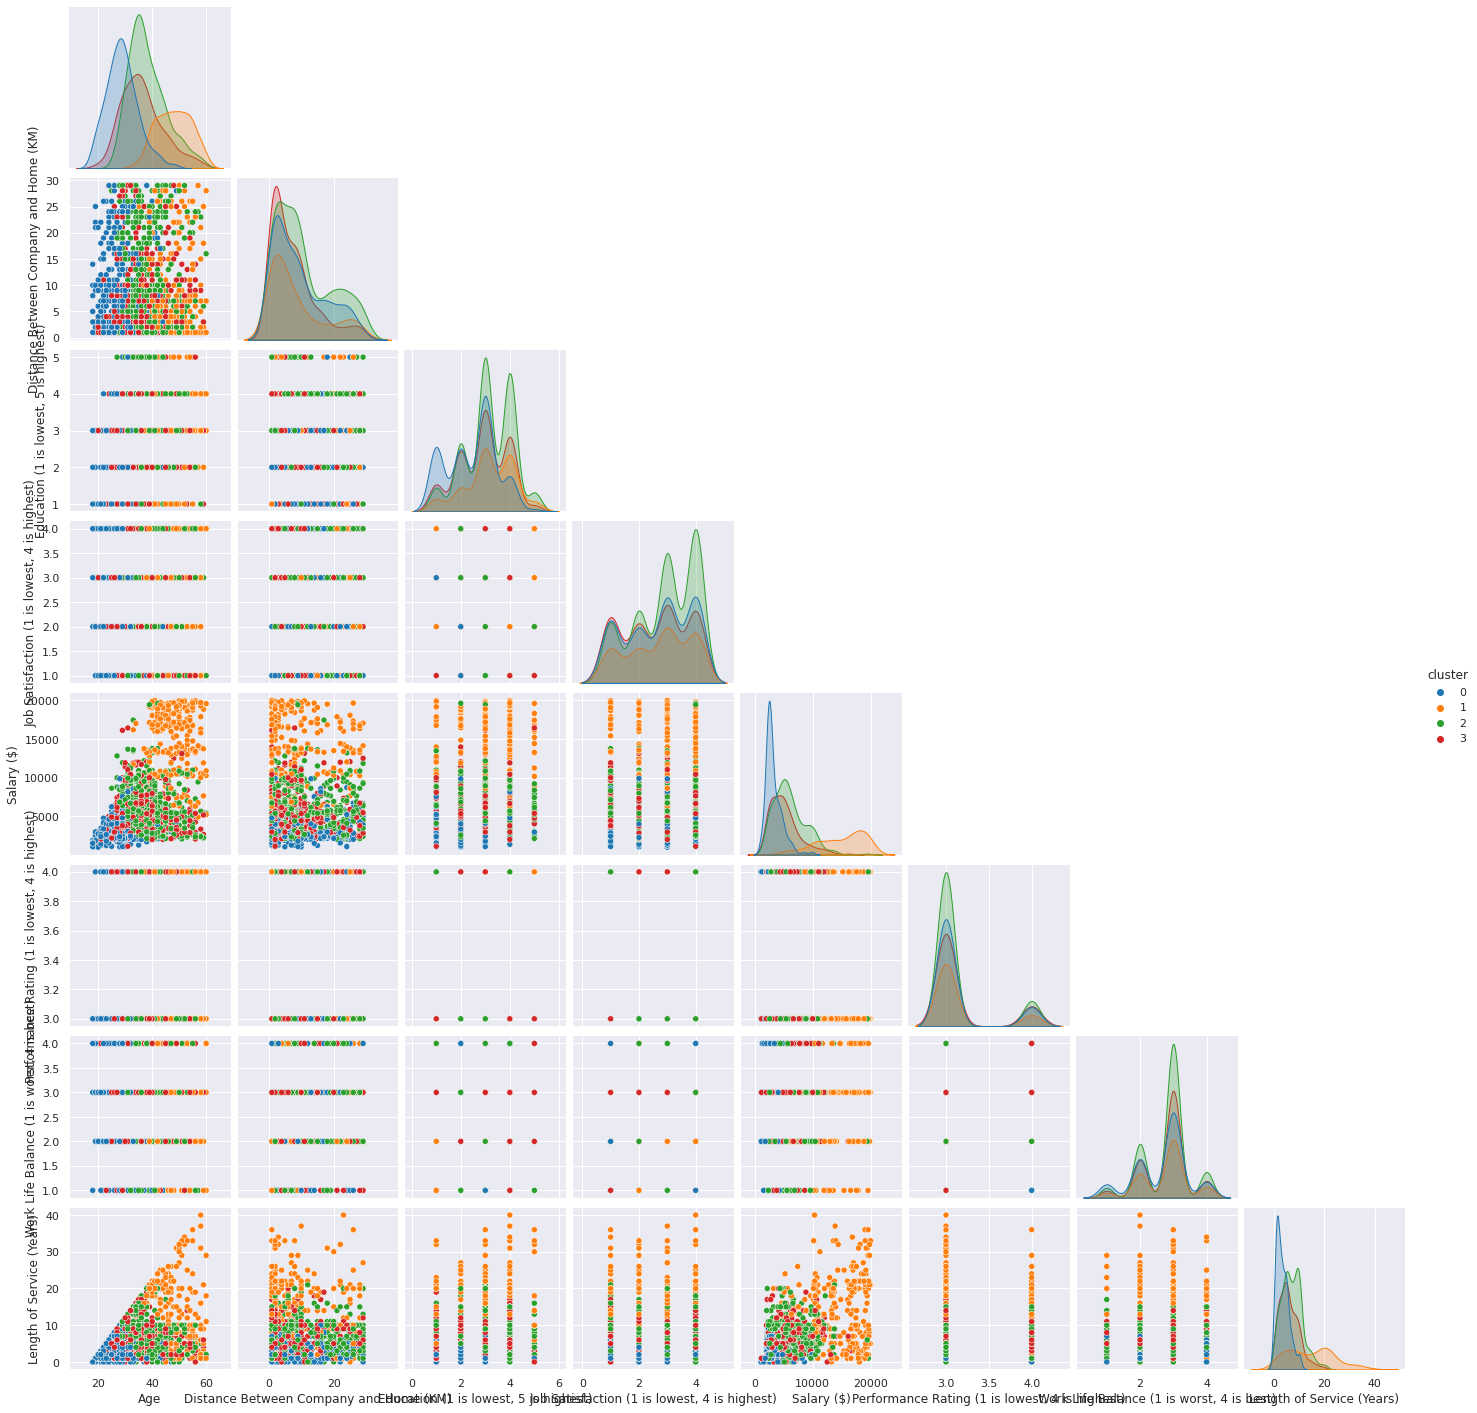

In [125]:
sns.pairplot(kmeDf, hue='cluster', corner=True, palette="tab10")

<AxesSubplot:title={'center':'Silhouette Analysis'}, xlabel='Silhouette coefficient values', ylabel='Cluster label'>

name  silihouette_score  davies_bouldin_score
0  KMethoid           0.368147              0.883279

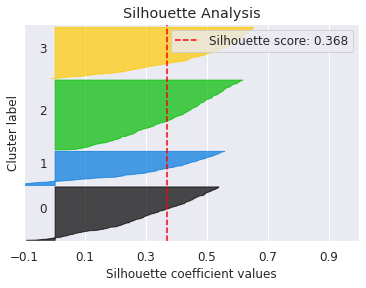

In [126]:
current,record=evaluateCluster(x_train,result,'KMethoid')
current

### K means

In [127]:
def k_cluster(x):
    fig, ax = plt.subplots(figsize=(10,5))

    inertia = []
    for no_cluster in range(1,11):
        model = KMeans(n_clusters=no_cluster,init="k-means++",max_iter=100)
        clusters = model.fit_predict(x)
        print('loop '+str(no_cluster))
        inertia.append(model.inertia_)
    ax.plot(list(range(1, 11)), inertia, 'o-')  
    ax.set_title("Elbow Plot")
    ax.set_ylabel('Inertia')
    ax.set_xlabel('No of Clusters')
    return fig.show()

loop 1
loop 2
loop 3
loop 4
loop 5
loop 6
loop 7
loop 8
loop 9
loop 10


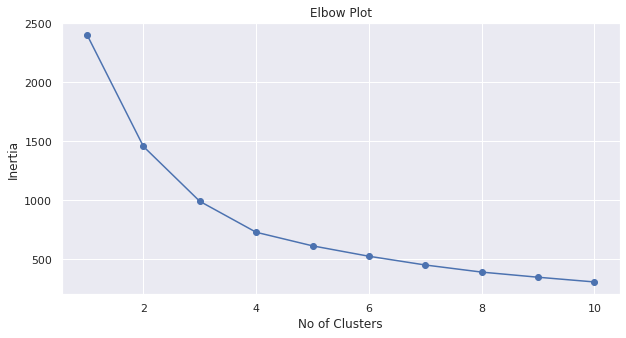

In [128]:
k_cluster(x_train)

In [129]:
result,km=algorithm(KMeans(n_clusters=4,init="k-means++",max_iter=100),'cluster',x_train)
evaluation,kmDf=getCluster(emDf,result)
evaluation

Age  Distance Between Company and Home (KM)  \
cluster                                                      
0        28.907895                                9.521053   
1        48.239631                                8.414747   
2        38.553106                               10.613226   
3        36.328877                                7.414439   

         Education (1 is lowest, 5 is highest)  \
cluster                                          
0                                     2.463158   
1                                     3.161290   
2                                     3.154309   
3                                     2.903743   

         Job Satisfaction (1 is lowest, 4 is highest)    Salary ($)  \
cluster                                                               
0                                            2.671053   3191.913158   
1                                            2.695853  15239.041475   
2                                            2.901804   6230.278557   
3                                            2.574866   5162.034759   

         Performance Rating (1 is lowest, 4 is highest)  \
cluster                                                   
0                                              3.150000   
1                                              3.147465   
2                                              3.142285   
3                                              3.176471   

         Work Life Balance (1 is worst, 4 is best)  Length of Service (Years)  \
cluster                                                                         
0                                         2.673684                   3.297368   
1                                         2.760369                  14.958525   
2                                         2.807615                   7.164329   
3                                         2.788770                   5.957219   

         cluster size  
cluster                
0           25.850340  
1           14.761905  
2           33.945578  
3           25.442177

/home/jiayu/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

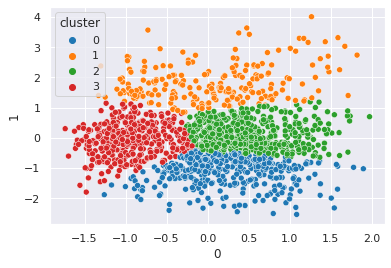

In [130]:
sns.scatterplot(pd.DataFrame(x_train)[0],pd.DataFrame(x_train)[1],hue=kmDf.cluster, palette="tab10")

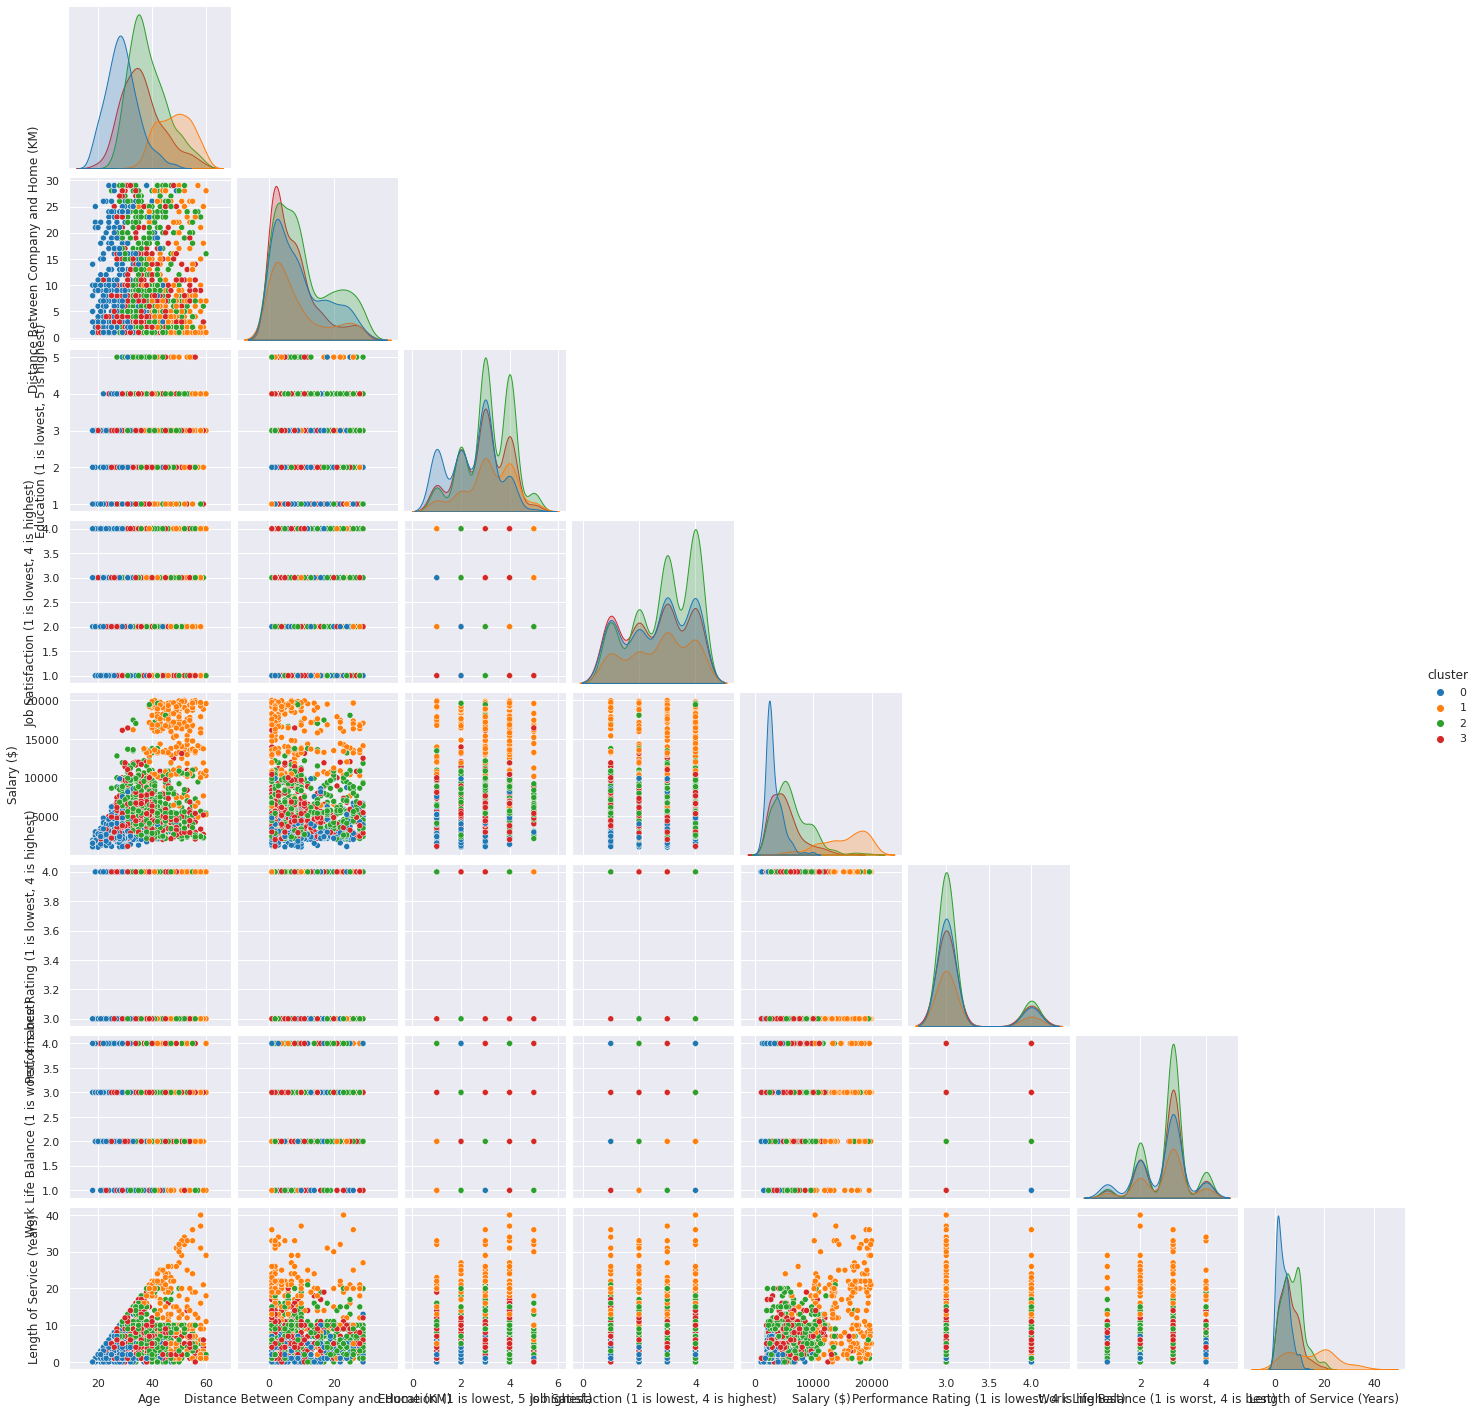

In [131]:
sns.pairplot(kmDf, hue='cluster', corner=True, palette="tab10")

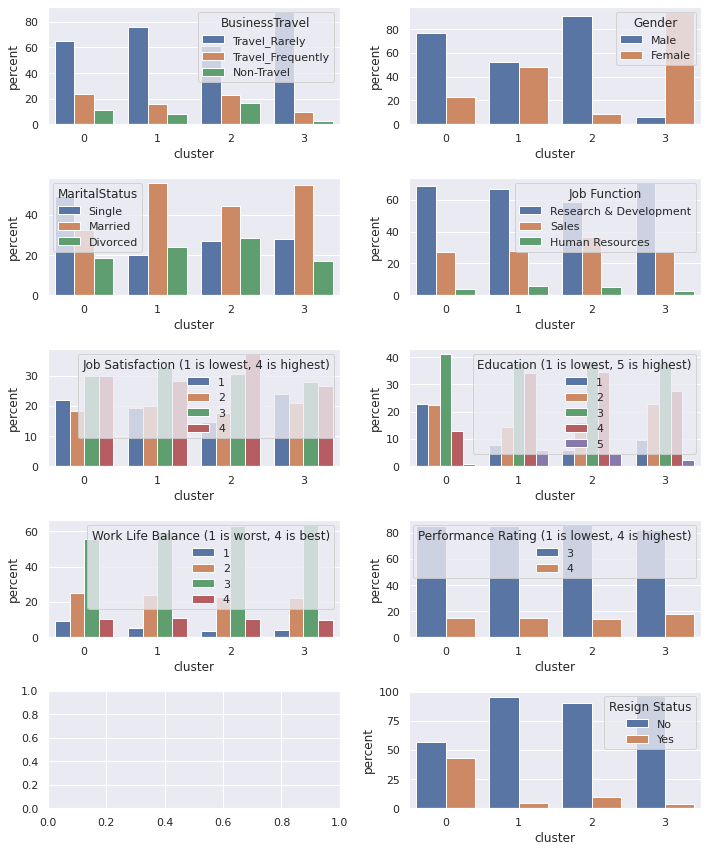

In [132]:
qualitativeEvaluation(kmDf)

/tmp/ipykernel_12543/3792593614.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  ax1.plot(rangeSearch,silhouette_avg,'bx-',color='blue',label='Silhouette')
/tmp/ipykernel_12543/3792593614.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  ax2.plot(rangeSearch,davies_avg,'bx-',color='red',label='Davies Bouldin')


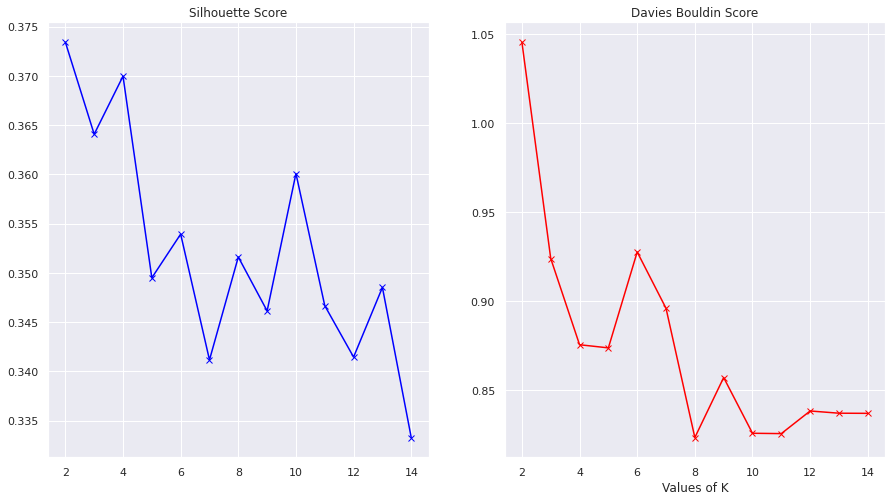

In [133]:
GridSearchForK(x_train,2,15,KMeans,init="k-means++",max_iter=100)

<AxesSubplot:title={'center':'Silhouette Analysis'}, xlabel='Silhouette coefficient values', ylabel='Cluster label'>

name  silihouette_score  davies_bouldin_score
0  KMeans++           0.370927              0.875172

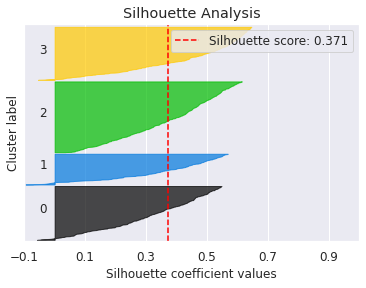

In [134]:
current,record=evaluateCluster(x_train,result,'KMeans++',record)
current

### Agglomerative Clustering

In [135]:

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


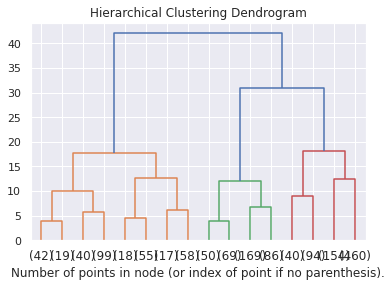

In [136]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(x_train)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [137]:
result,hiera=algorithm(AgglomerativeClustering(n_clusters=3),'cluster',x_train)
evaluation,hiDf=getCluster(emDf,result)
evaluation

Age  Distance Between Company and Home (KM)  \
cluster                                                      
0        32.602941                                9.756684   
1        45.847701                                9.632184   
2        37.262032                                7.655080   

         Education (1 is lowest, 5 is highest)  \
cluster                                          
0                                     2.732620   
1                                     3.218391   
2                                     2.989305   

         Job Satisfaction (1 is lowest, 4 is highest)    Salary ($)  \
cluster                                                               
0                                            2.774064   4193.629679   
1                                            2.787356  12558.979885   
2                                            2.582888   5486.494652   

         Performance Rating (1 is lowest, 4 is highest)  \
cluster                                                   
0                                              3.155080   
1                                              3.140805   
2                                              3.163102   

         Work Life Balance (1 is worst, 4 is best)  Length of Service (Years)  \
cluster                                                                         
0                                         2.728610                   4.733957   
1                                         2.772989                  12.885057   
2                                         2.815508                   6.088235   

         cluster size  
cluster                
0           50.884354  
1           23.673469  
2           25.442177

/home/jiayu/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

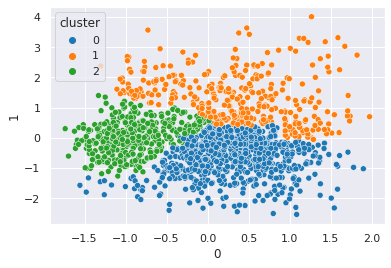

In [138]:
sns.scatterplot(pd.DataFrame(x_train)[0],pd.DataFrame(x_train)[1],hue=hiDf.cluster, palette="tab10")

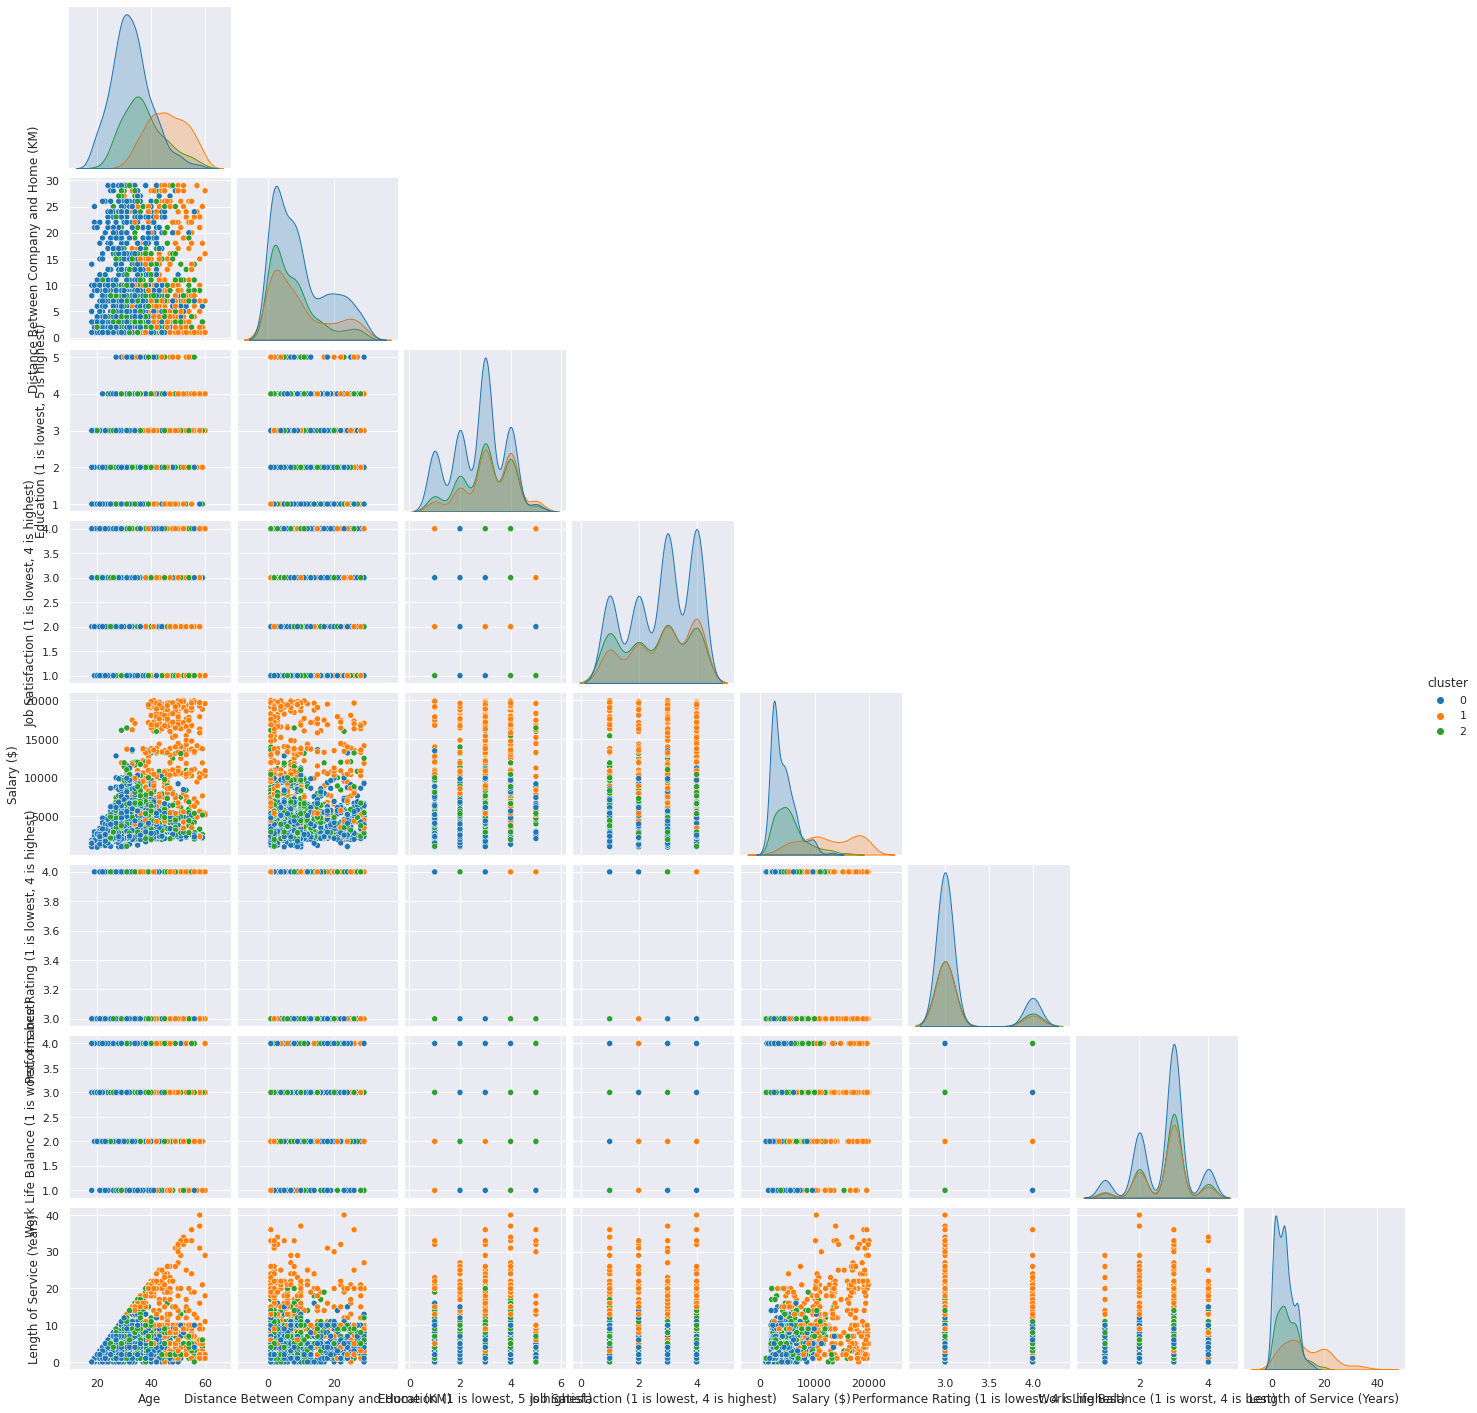

In [139]:
sns.pairplot(hiDf, hue='cluster', corner=True, palette="tab10")

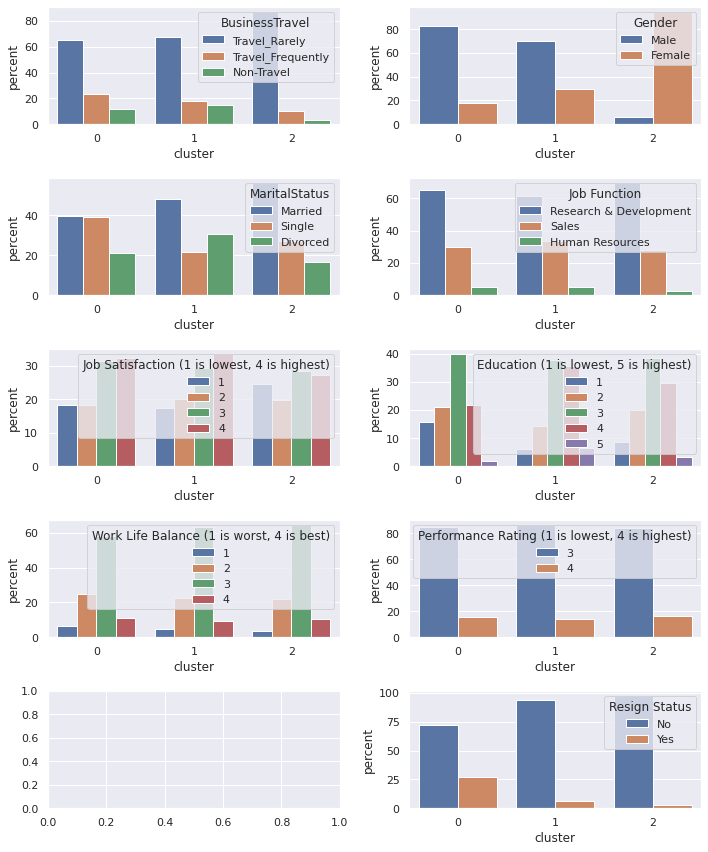

In [140]:

qualitativeEvaluation(hiDf)

<AxesSubplot:title={'center':'Silhouette Analysis'}, xlabel='Silhouette coefficient values', ylabel='Cluster label'>

name  silihouette_score  davies_bouldin_score
0  Hierarchical Clustering            0.35473              0.902888

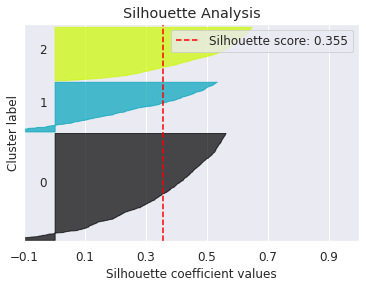

In [141]:

current,record=evaluateCluster(x_train,result,'Hierarchical Clustering',record)
current

/tmp/ipykernel_12543/3792593614.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  ax1.plot(rangeSearch,silhouette_avg,'bx-',color='blue',label='Silhouette')
/tmp/ipykernel_12543/3792593614.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  ax2.plot(rangeSearch,davies_avg,'bx-',color='red',label='Davies Bouldin')


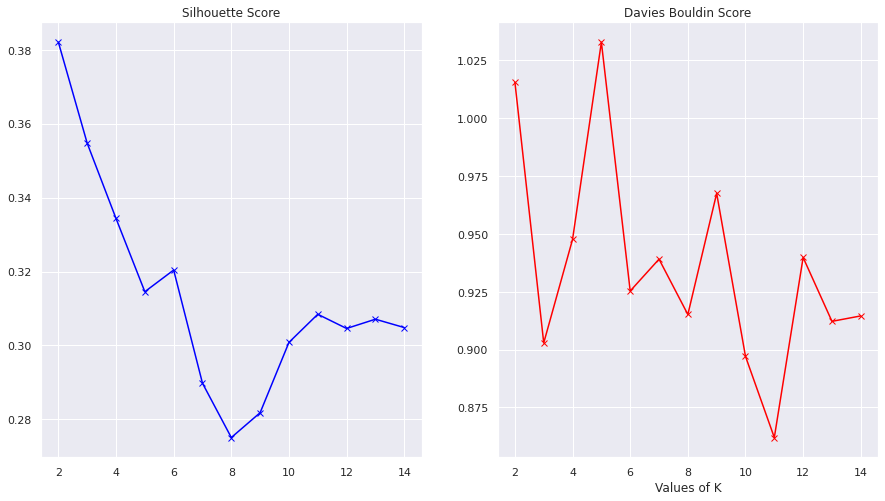

In [142]:
GridSearchForK(x_train,2,15,AgglomerativeClustering)

### DBSCAN

In [143]:
def elbatta_eps(X):
    distances, indices = NearestNeighbors(n_neighbors=3).fit(X).kneighbors(X)
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(distances)
    ax.set_title("Elbatta's EPs Plot")
    ax.set_ylabel('eps')
    return fig.show()

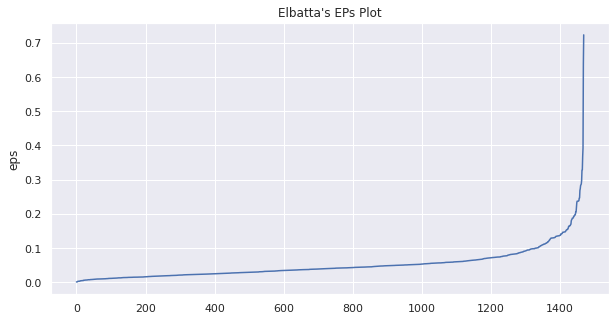

In [144]:
elbatta_eps(x_train)

In [145]:

result,dbscan=algorithm(DBSCAN(eps=0.25),'cluster',x_train)
evaluation,dbDf=getCluster(emDf,result)
evaluation

Age  Distance Between Company and Home (KM)  \
cluster                                                      
-1       41.705882                               10.176471   
 0       36.751938                                9.157153   

         Education (1 is lowest, 5 is highest)  \
cluster                                          
-1                                    2.882353   
 0                                    2.914024   

         Job Satisfaction (1 is lowest, 4 is highest)    Salary ($)  \
cluster                                                               
-1                                           2.588235  12113.823529   
 0                                           2.733615   6301.271318   

         Performance Rating (1 is lowest, 4 is highest)  \
cluster                                                   
-1                                             3.137255   
 0                                             3.154334   

         Work Life Balance (1 is worst, 4 is best)  Length of Service (Years)  \
cluster                                                                         
-1                                        2.745098                  18.901961   
 0                                        2.761804                   6.580691   

         cluster size  
cluster                
-1           3.469388  
 0          96.530612

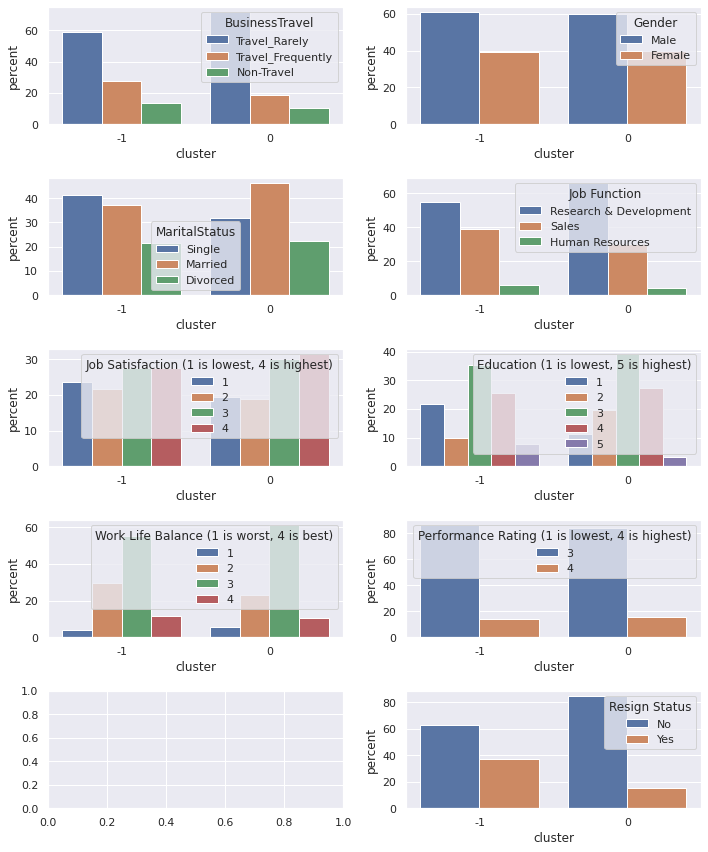

In [146]:

qualitativeEvaluation(dbDf)

/home/jiayu/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

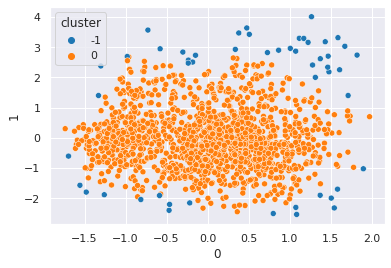

In [147]:
sns.scatterplot(pd.DataFrame(x_train)[0],pd.DataFrame(x_train)[1],hue=dbDf.cluster, palette="tab10")

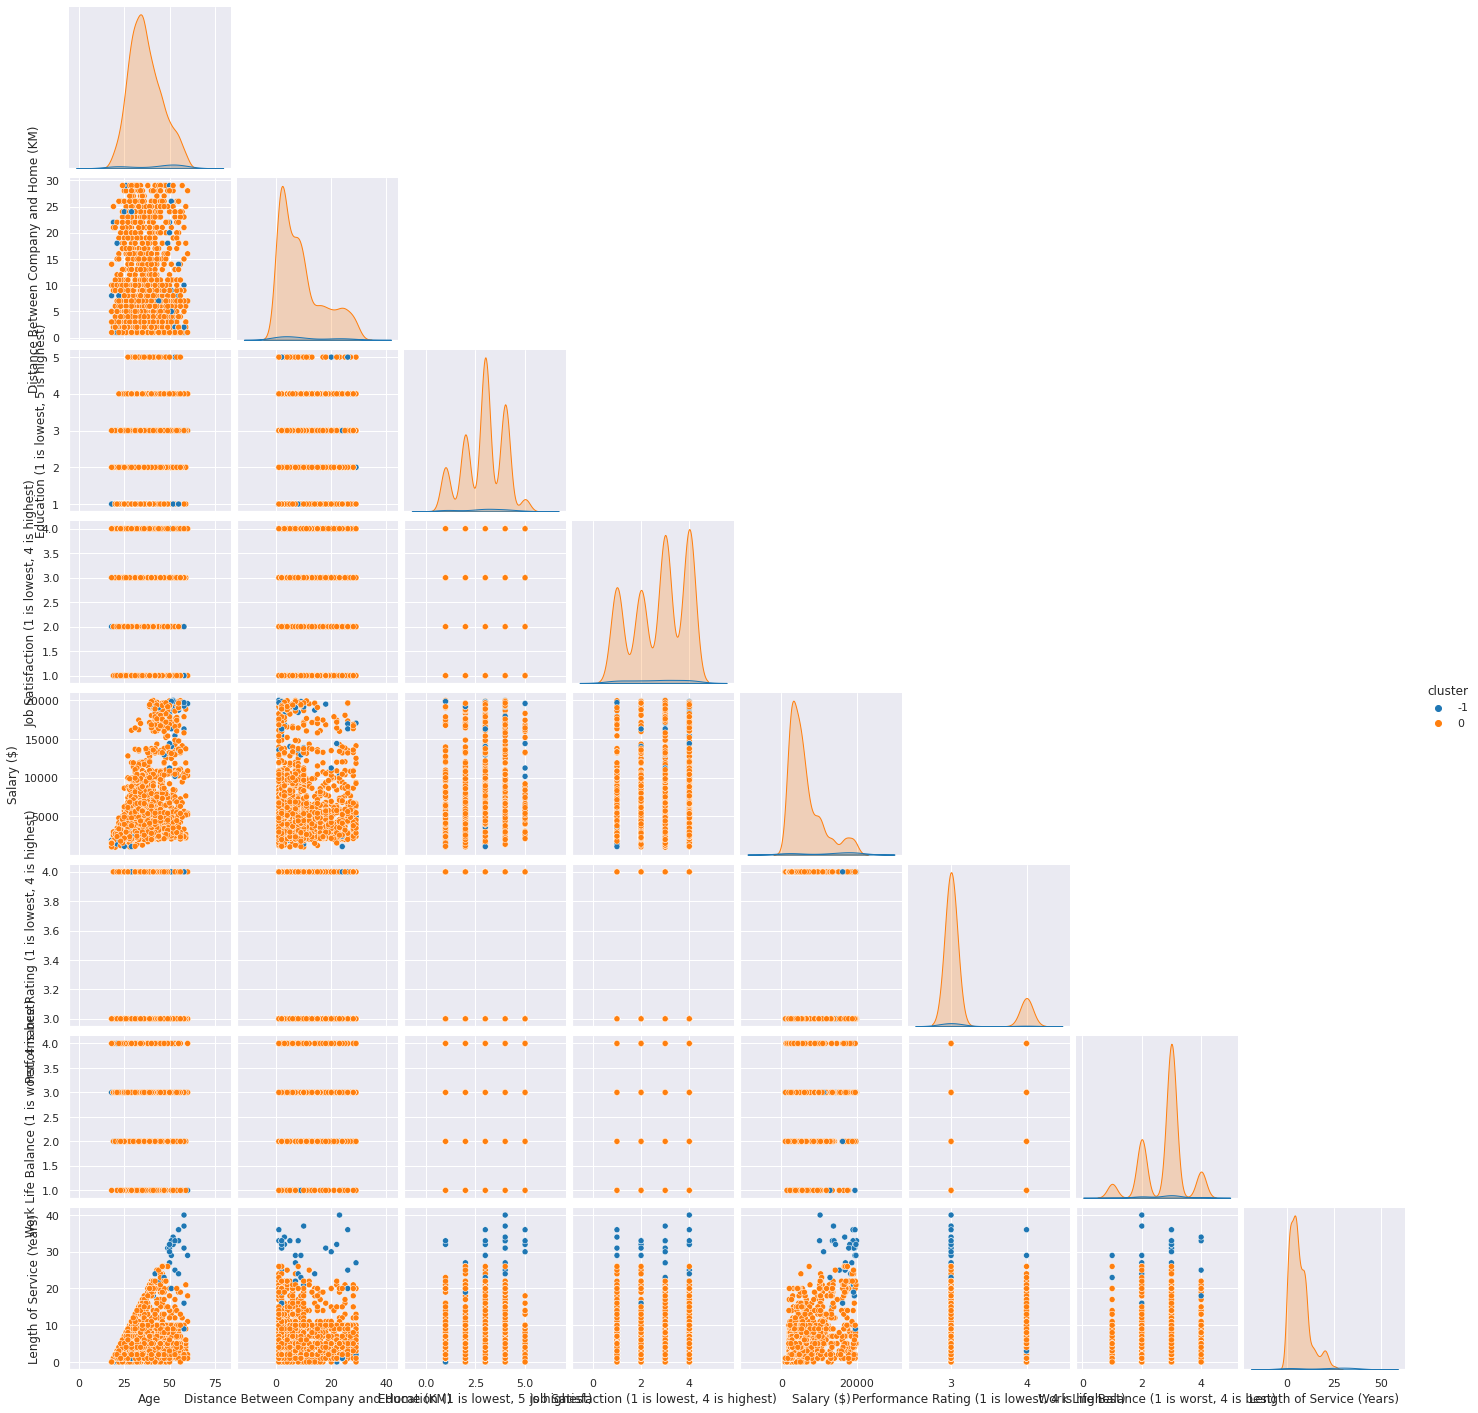

In [148]:
sns.pairplot(dbDf, hue='cluster', corner=True, palette="tab10")


<AxesSubplot:title={'center':'Silhouette Analysis'}, xlabel='Silhouette coefficient values', ylabel='Cluster label'>

name  silihouette_score  davies_bouldin_score
0  DBSCAN           0.471174              2.528541

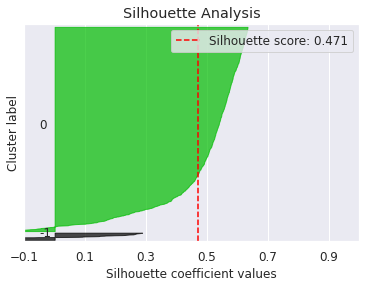

In [149]:
current,record=evaluateCluster(x_train,result,'DBSCAN',record)
current

### SpectralClustering

In [150]:
result,spclust=algorithm(SpectralClustering(n_clusters=2),'cluster',x_train)
evaluation,scDf=getCluster(emDf,result)
evaluation

Age  Distance Between Company and Home (KM)  \
cluster                                                      
0        35.840892                                9.193309   
1        48.576000                                9.184000   

         Education (1 is lowest, 5 is highest)  \
cluster                                          
0                                     2.892937   
1                                     3.128000   

         Job Satisfaction (1 is lowest, 4 is highest)    Salary ($)  \
cluster                                                               
0                                            2.732342   5552.371004   
1                                            2.688000  16730.960000   

         Performance Rating (1 is lowest, 4 is highest)  \
cluster                                                   
0                                              3.154647   
1                                              3.144000   

         Work Life Balance (1 is worst, 4 is best)  Length of Service (Years)  \
cluster                                                                         
0                                         2.752416                   5.888476   
1                                         2.856000                  19.056000   

         cluster size  
cluster                
0           91.496599  
1            8.503401

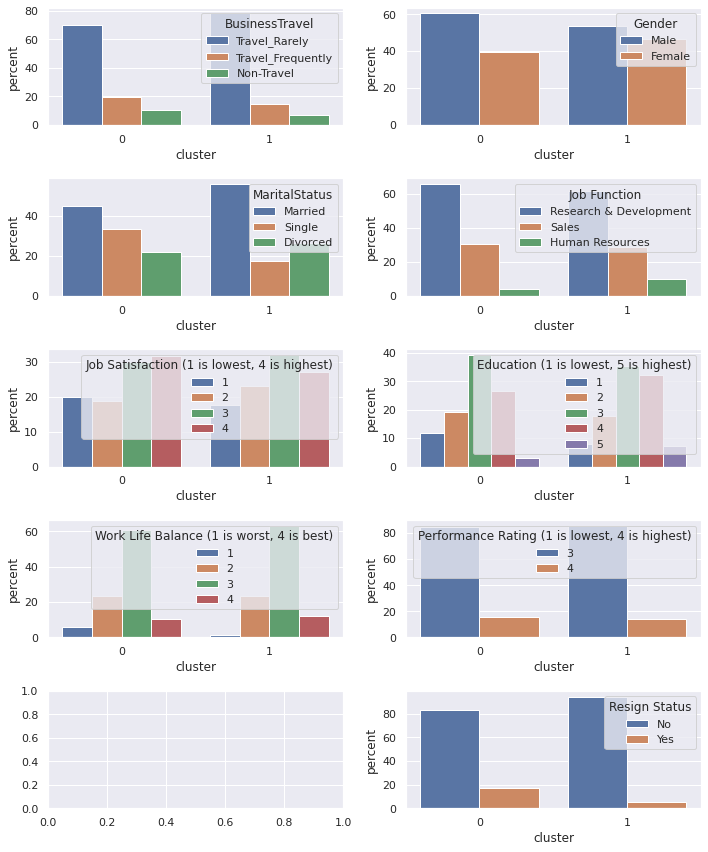

In [151]:

qualitativeEvaluation(scDf)

/home/jiayu/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

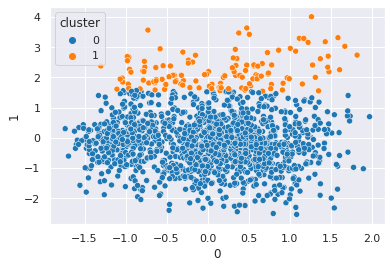

In [152]:
sns.scatterplot(pd.DataFrame(x_train)[0],pd.DataFrame(x_train)[1],hue=scDf.cluster, palette="tab10")

<AxesSubplot:title={'center':'Silhouette Analysis'}, xlabel='Silhouette coefficient values', ylabel='Cluster label'>

name  silihouette_score  davies_bouldin_score
0  Spectral Clustering           0.448073              0.744779

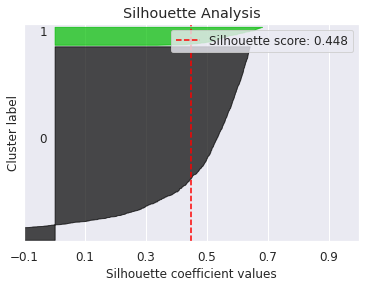

In [153]:
current,record=evaluateCluster(x_train,result,'Spectral Clustering',record)
current

/tmp/ipykernel_12543/3792593614.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  ax1.plot(rangeSearch,silhouette_avg,'bx-',color='blue',label='Silhouette')
/tmp/ipykernel_12543/3792593614.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  ax2.plot(rangeSearch,davies_avg,'bx-',color='red',label='Davies Bouldin')


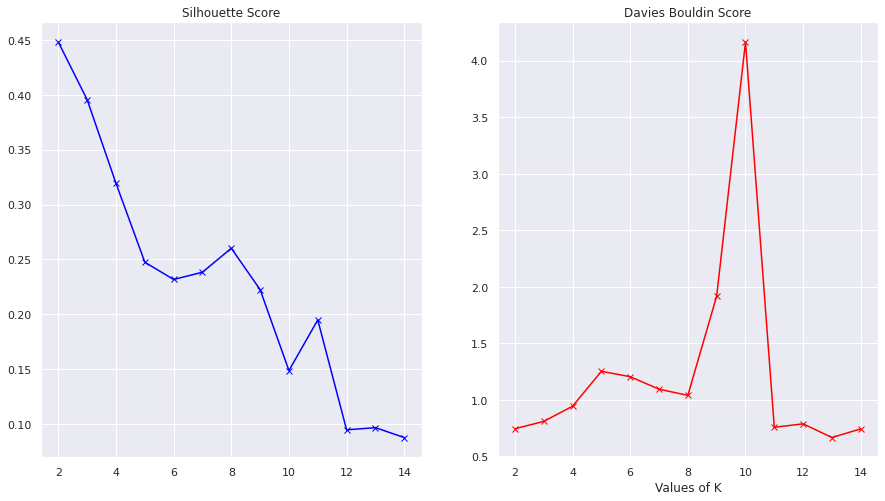

In [154]:
GridSearchForK(x_train,2,15,SpectralClustering)

## Result and Discussion
Considering the overall quality of the clustering formed ,together with the silihouette score and the davies bouldin score, we conclude that the Kmean++ has done the best in the experiment. 4 clusters are formed ,it reaches a relatively high silihoutte score of 0.371 and a low davies bouldin score of 0.875.

In [155]:
record

name  silihouette_score  davies_bouldin_score
0                 KMethoid           0.368147              0.883279
1                 KMeans++           0.370927              0.875172
2  Hierarchical Clustering           0.354730              0.902888
3                   DBSCAN           0.471174              2.528541
4      Spectral Clustering           0.448073              0.744779

## Final Evaluation

In this experiment ,4 clusters were formed.Each of the clusters has attributes that is different from one another.The characteristic of each cluster are explained below.

### Characteristic of cluster
For the first cluster (cluster 0),they are a group of employee that are above the average age.Most employee in this group are male. They have a relatively high education and have the highest satifaction toward their job. Their performance was quite average. They have the best work life balance and have work relatively long in the company.More than half of them are married.They mostly do not travel offen.This group are accounted for more than 1/3 of the total employees.

For the second cluster (cluster 1), they are a group of balanced gender employees that are mostly one of the oldest in company. This group of employee have donated much of their life in the company ,most stayed the very long in the company. They mostly have very high education (average highest) and have the highest salary in the company.Their performance and work life balance is quite average.Employee in this group average have average job satisfaction.Many of this group of employee are married(more than 80%).They dont travel frequent too. This group are accounted for 14% of the total employee.


For the third cluster (cluster 2), they are a group of employee that are of average age.Most employees in this group are female. Most of them have a average education(mostly colleage to master). This group of employee average have slightly higher than the average salary of employee.Their average performance is the highest and have average work life balance. Many employee in this group are married.They average work for around 5 years in the company.However,employee in this group average have below average job satisfaction.Nevertheless, very less percentage of people in this group(average lowest) choose to resign. This group are accounted for 1/4 of the total employee.

For the last cluster (cluster 3),they are a group of very young employees(average 28 years old).Large number of employees in this group are male.Average employee in this group has education that is not high.(below average).Their average performance is around the average performance of the company. Their average work life balance is below average but their job satisfaction is average. They average work around 3 years which is relatively short.Their average salary is quite low.Most of the employees in this group are single.Many employees in this group tend to resign. This is not surprising as they are still young,mostly single and therefore still have the opportunity to switch their job.They may just work short term for the job experience.This group of employee are also accounted for 1/4 of the total employee.


### Suggestions and Improvement

After serious consideration , we thought that the management should try do something to retain the employees of the third cluster (cluster 2). The employees from cluster 2 has the highest average performance and a relatively high average work life balance.Retaining them can help to ensure high work performance and good employee health at the same time which is benefical for the overall growth of company.Looking at the average job satisfaction, their satifaction are the lowest.The company should try to improve their work experience and improve their salary to improve their satisfaction to avoid loss of these human resources.

Other suggestions includes to give regular training to staff as we see that the average performance of long-staying staff(Long length of service) isnt very high.In this case,training can be provided to them to upgrade and improve efficiency.

Other than that, the company should also try to retain employees of cluster 3 by providing better job environment and experience.(such as discounted meals or free bus service for employees staying far) .This is because that the employee in cluster 3 are young employee.Old employees will definitely retire one day. To ensure consistent supply of man-power in the company,the company should make attempt to retain these young talents in the time.Additionally,the improvement made can not only retain employee of cluster 3 ,but also beneficial for all staff in company.


In [162]:
emDf.describe()

Age  Distance Between Company and Home (KM)  \
count  1470.000000                             1470.000000   
mean     36.923810                                9.192517   
std       9.135373                                8.106864   
min      18.000000                                1.000000   
25%      30.000000                                2.000000   
50%      36.000000                                7.000000   
75%      43.000000                               14.000000   
max      60.000000                               29.000000   

       Education (1 is lowest, 5 is highest)  \
count                            1470.000000   
mean                                2.912925   
std                                 1.024165   
min                                 1.000000   
25%                                 2.000000   
50%                                 3.000000   
75%                                 4.000000   
max                                 5.000000   

       Job Satisfaction (1 is lowest, 4 is highest)    Salary ($)  \
count                                   1470.000000   1470.000000   
mean                                       2.728571   6502.931293   
std                                        1.102846   4707.956783   
min                                        1.000000   1009.000000   
25%                                        2.000000   2911.000000   
50%                                        3.000000   4919.000000   
75%                                        4.000000   8379.000000   
max                                        4.000000  19999.000000   

       Performance Rating (1 is lowest, 4 is highest)  \
count                                     1470.000000   
mean                                         3.153741   
std                                          0.360824   
min                                          3.000000   
25%                                          3.000000   
50%                                          3.000000   
75%                                          3.000000   
max                                          4.000000   

       Work Life Balance (1 is worst, 4 is best)  Length of Service (Years)  
count                                1470.000000                1470.000000  
mean                                    2.761224                   7.008163  
std                                     0.706476                   6.126525  
min                                     1.000000                   0.000000  
25%                                     2.000000                   3.000000  
50%                                     3.000000                   5.000000  
75%                                     3.000000                   9.000000  
max                                     4.000000                  40.000000

In [156]:
result,km=algorithm(KMeans(n_clusters=4,init="k-means++",max_iter=100),'cluster',x_train)
evaluation,kmDf=getCluster(emDf,result)
evaluation

Age  Distance Between Company and Home (KM)  \
cluster                                                      
0        38.503968                               10.654762   
1        48.150685                                8.433790   
2        36.335121                                7.412869   
3        28.807487                                9.441176   

         Education (1 is lowest, 5 is highest)  \
cluster                                          
0                                     3.152778   
1                                     3.164384   
2                                     2.903485   
3                                     2.451872   

         Job Satisfaction (1 is lowest, 4 is highest)    Salary ($)  \
cluster                                                               
0                                            2.896825   6150.750000   
1                                            2.694064  15253.452055   
2                                            2.573727   5164.067024   
3                                            2.676471   3188.844920   

         Performance Rating (1 is lowest, 4 is highest)  \
cluster                                                   
0                                              3.142857   
1                                              3.146119   
2                                              3.176944   
3                                              3.149733   

         Work Life Balance (1 is worst, 4 is best)  Length of Service (Years)  \
cluster                                                                         
0                                         2.811508                   7.150794   
1                                         2.753425                  14.890411   
2                                         2.785523                   5.962466   
3                                         2.673797                   3.243316   

         cluster size  
cluster                
0           34.285714  
1           14.897959  
2           25.374150  
3           25.442177

/home/jiayu/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

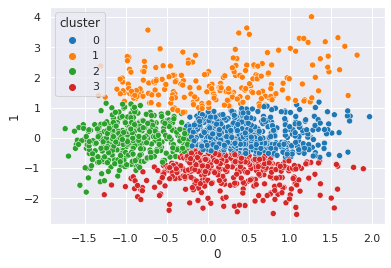

In [157]:
sns.scatterplot(pd.DataFrame(x_train)[0],pd.DataFrame(x_train)[1],hue=kmDf.cluster, palette="tab10")

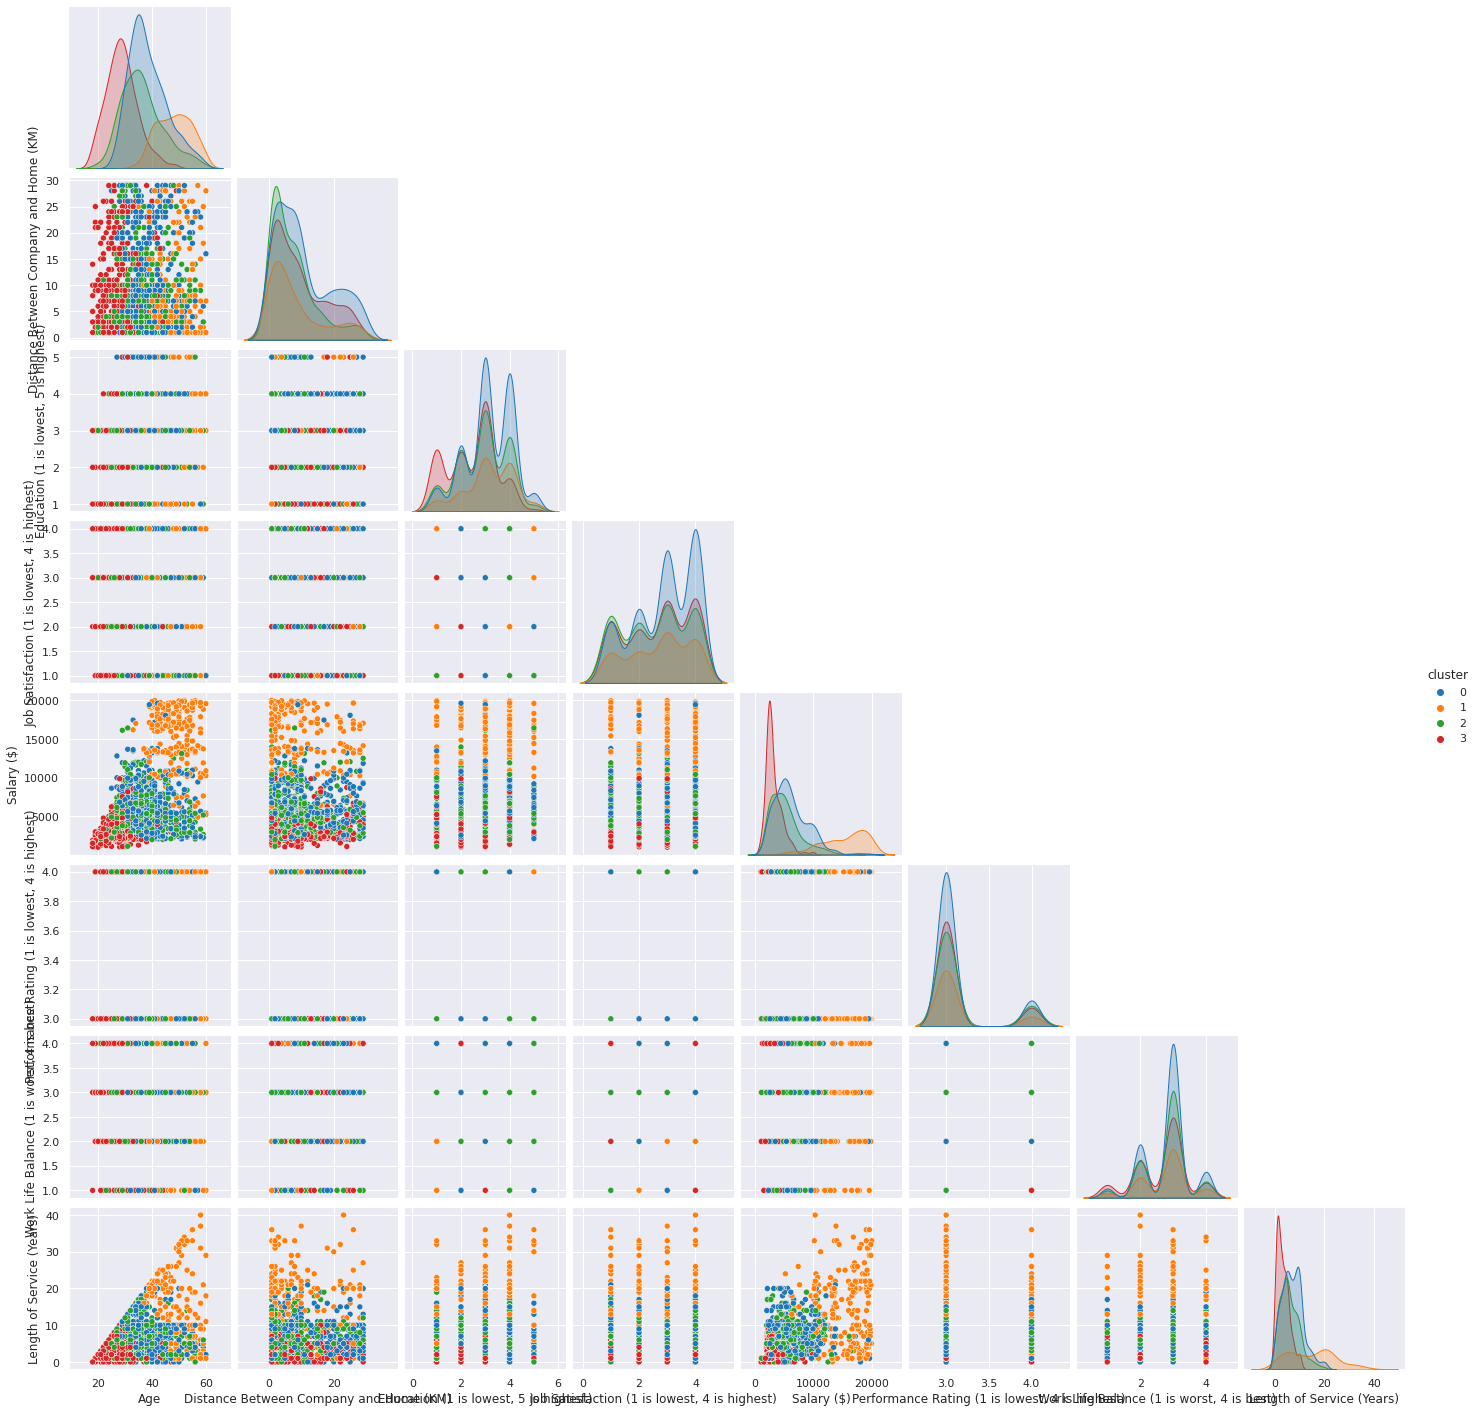

In [158]:
sns.pairplot(kmDf, hue='cluster', corner=True, palette="tab10")

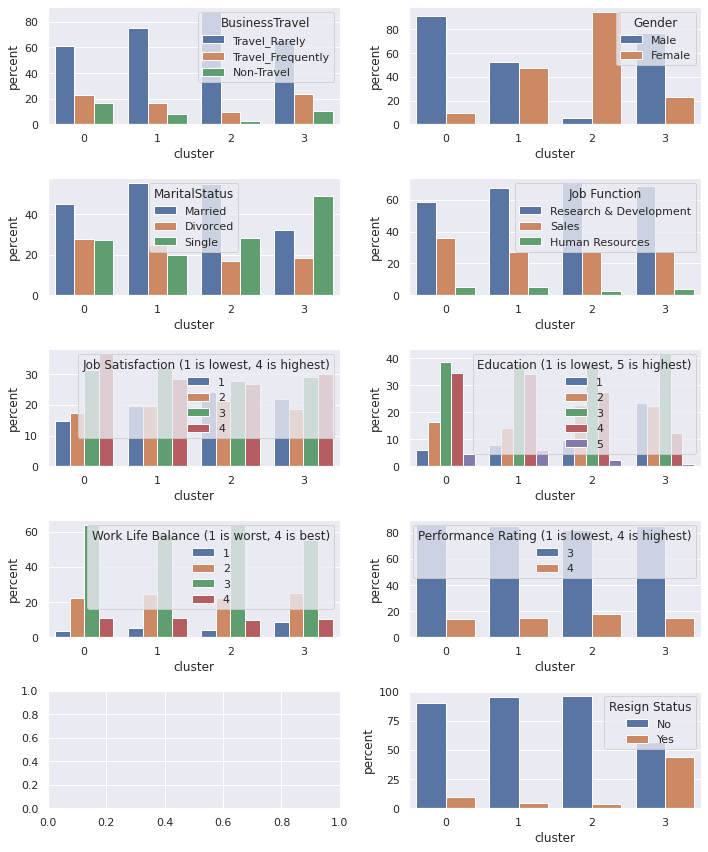

In [159]:
qualitativeEvaluation(kmDf)

<AxesSubplot:title={'center':'Silhouette Analysis'}, xlabel='Silhouette coefficient values', ylabel='Cluster label'>

name  silihouette_score  davies_bouldin_score
0  KMeans++           0.371364              0.875732

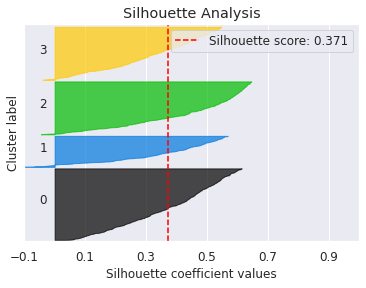

In [160]:
current,t=evaluateCluster(x_train,result,'KMeans++')
current

## Reference

[1] Gartner, 2021."HR Analytics". Available at https://www.gartner.com/en/human-resources/glossary/hr-analytics. [Last accessed on 30/7/2022]

[2] Ministry of Manpower, Singapore.,2010."MANAGING WORKPLACE DIVERSITY". Available at https://www.mom.gov.sg/~/media/mom/documents/employment-practices/wdm/workplace%20diversity%20management%20tookit%20and%20managers%20guide.pdf [Last accessed on 30/7/2022]

[3] Soontag, M.,2022."6 Easy, Effective Ways to Motivate Employees". Available at https://www.repsly.com/blog/field-team-management/6-easy-effective-ways-to-motivate-employees [Last accessed on 30/7/2022]

[4] Mitchell, T.,2022.” Machine Learning”. McGraw Hill Education.

[5] Brown, S.,2021.” Machine learning, explained”. Available at https://mitsloan.mit.edu/ideas-made-to-matter/machine-learning-explained . [Last accessed on 28/7/2022]

[6] Chen, Z. F.,2022."An Evaluation of Methods for Mixed-Type Data Clustering". [Last accessed on 30/7/2022]

[7] Subhash, P.,2017."IBM HR Analytics Employee Attrition & Performance" Available at https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/metadata . [Last accessed on 30/7/2022]

[8] Ahsan, M M., et al.2021.” Effect of Data Scaling Methods on Machine Learning
Algorithms and Model Performance”. Available at https://doi.org/10.3390/technologies9030052 .[Last accessed o 3/5/2022]

[9] Chávez, E., Navarro, G.2001.” A Probabilistic Spell for the Curse of Dimensionality.” Springer, Berlin, Heidelberg. Available at https://doi.org/10.1007/3-540-44808-X_12 .[Last accessed on 3/5/2022]

[10] Song, M. et al.,2012.” A comparative study of dimensionality reduction techniques to enhance trace clustering performances” Available at https://doi.org/10.1016/j.eswa.2012.12.078 . [Last accessed on 3/5/2022]

[11] Pearson, K., 1901.” On Lines and Planes of Closest Fit to Systems of Points in Space”. Available at https://doi.org/10.1080%2F14786440109462720 .[Last accessed on 29/7/2022]

[12] Barnett, T. P. & Preisendorfer, R.,987.” Origins and levels of monthly and seasonal forecast skill for United States surface air temperatures determined by canonical correlation analysis”. Available at https://doi.org/10.1175%2F1520-0493%281987%29115%3C1825%3Aoaloma%3E2.0.co%3B2 . [Last accessed on 29/7/2022]

[13] Hair, J. F. et al., 2012. “Multivariate Data Analysis (7th Edition)” Pearson Education PLC

[14] Dash, M. & Liu, H.,2000."Feature Selection for Clustering" Available at https://www.public.asu.edu/~huanliu/papers/pakdd00clu.pdf . [Last accessed on 29/7/2022]

[15] He, X. et al.,2005."Laplacian Score for Feature Selection" Available at https://proceedings.neurips.cc/paper/2005/file/b5b03f06271f8917685d14cea7c6c50a-Paper.pdf .[Last accessed on 29/7/2022]

[16] Scikit-learn: Machine Learning in Python, Pedregosa et al.,2011."sklearn.metrics.silhouette_score" JMLR 12, pp. 2825-2830. Available at https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html [Last accessed on 29/7/2022]